<a href="https://colab.research.google.com/github/DtotheS/AI-in-the-wild/blob/main/src/sport_participation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.animation as animation

# Allow Korean in img
plt.rcParams['font.family'] = 'AppleGothic'  # Use 'Nanum Gothic' on Linux/Mac
plt.rcParams['axes.unicode_minus'] = False  # Fix issue with negative signs

In [ ]:
# # linking to my google drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./DtotheS/sport_analytics/dr_oh/sports_survey
!pwd

/Users/agathos/DtotheS/sport_analytics/dr_oh/sports_survey
/Users/agathos/DtotheS/sport_analytics/dr_oh/sports_survey


# 2023 Preliminary EDA

In [ ]:
# Use read_excel for .xlsx files
df = pd.read_excel('data/2023 국민생활체육참여실태조사 rawdata.xlsx', header=2)

In [ ]:
df.head()

In [ ]:
# Assuming 'Q16' is a column name in your DataFrame 'df'
part_count = df[df['Q16'] != 1]['Q16'].count()
notpart_count = df[df['Q16'] == 1]['Q16'].count()

In [ ]:
df.describe()

,ID,APT,SEX,YEAR,MON,AGE,Q1,Q2,Q2_etc,Q3,...,D_AREA1,D_AREA2,D_CODE5,D_SEX,D_AGE,D_SEXAGE,D_DQ3A,D_DQ1,D_DQ4,WT
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,0.0,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,5326.802444,1.521778,1.499889,1976.631333,6.146667,46.091111,3.787889,2.332556,NaN,3.602778,...,1.683000,8.362444,1.794222,1.499889,4.108111,7.607333,5.104556,3.447556,7.150222,5350.968000
std,3937.010235,0.499553,0.500028,18.973522,3.098171,18.957352,0.797128,0.721278,NaN,0.824325,...,0.465333,5.042983,0.783972,0.500028,1.937225,4.051457,1.869525,1.225414,3.843807,2638.323236
min,1.000000,1.000000,1.000000,1934.000000,1.000000,10.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1074.100000
25%,2256.750000,1.000000,1.000000,1960.000000,4.000000,29.000000,3.000000,2.000000,NaN,3.000000,...,1.000000,4.000000,1.000000,1.000000,2.000000,4.000000,4.000000,3.000000,4.000000,3564.161290
50%,5093.500000,2.000000,1.000000,1976.000000,6.000000,46.000000,4.000000,2.000000,NaN,4.000000,...,2.000000,9.000000,2.000000,1.000000,4.000000,7.000000,5.000000,3.000000,6.000000,4428.102564
75%,7623.250000,2.000000,2.000000,1994.000000,9.000000,63.000000,4.000000,3.000000,NaN,4.000000,...,2.000000,13.000000,2.000000,2.000000,6.000000,11.000000,6.000000,5.000000,11.000000,6273.636364
max,20275.000000,2.000000,2.000000,2013.000000,12.000000,89.000000,5.000000,4.000000,NaN,5.000000,...,2.000000,17.000000,3.000000,2.000000,7.000000,14.000000,10.000000,6.000000,13.000000,11616.435644


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Columns: 231 entries, ID to WT
dtypes: float64(152), int64(42), object(37)
memory usage: 15.9+ MB


In [ ]:
for ind, cnt in zip(df.isnull().sum().index,df.isnull().sum()):
    print(ind,' ',cnt)

ID   0
CODE1   0
APT   0
CODE5   0
CODE6   0
SEX   0
YEAR   0
MON   0
AGE   0
Q1   0
Q2   0
Q2_etc   9000
Q3   0
Q4   0
Q4_etc   9000
Q5_1   0
Q5_2   0
Q5_3   0
Q5_4   0
Q5_5   8998
Q5_etc   8998
Q6   0
Q7   0
Q7_1_1   3512
Q7_1_2   7886
Q7_1_3   8789
Q7_1_4   8953
Q7_1_5   8985
Q7_1_6   8998
Q7_1_7   8999
Q7_1_8   9000
Q7_1_9   9000
Q7_1_10   9000
Q7_1_11   9000
Q7_1_12   9000
Q7_1_13   9000
Q7_1_14   9000
Q7_1_15   9000
Q7_1_etc   9000
Q7_2   2472
Q7_2_etc   8980
Q7_3   6528
Q7_3_etc   8872
Q8_1   0
Q8_2   326
Q8_3   1735
Q9_1   0
Q9_2_1   6133
Q9_2_2   6523
Q9_2_3   8789
Q9_2_4   8641
Q9_2_5   8918
Q9_2_etc   8918
Q9_3_1   6133
Q9_3_2   6523
Q9_3_3   8789
Q9_3_4   8641
Q9_3_5   8918
Q10   0
Q11   0
Q11_1_1   7213
Q11_1_1_etc   7213
Q11_1_2   8733
Q11_1_2_etc   8733
Q11_1_3   8926
Q11_1_3_etc   8926
Q11_2   7213
Q11_3   7213
Q11_4   1787
Q11_4_etc   8929
Q12   0
Q12_1   7747
Q12_2   1253
Q12_2_etc   8953
Q13_1   0
Q13_2   149
Q13_3   1815
Q13_etc   8993
Q14   0
Q14_1_1   7931
Q14_1_2

In [ ]:
part_count = df[df['Q16'] != 1]['Q16'].count()
notpart_count = df[df['Q16'] == 1]['Q16'].count()

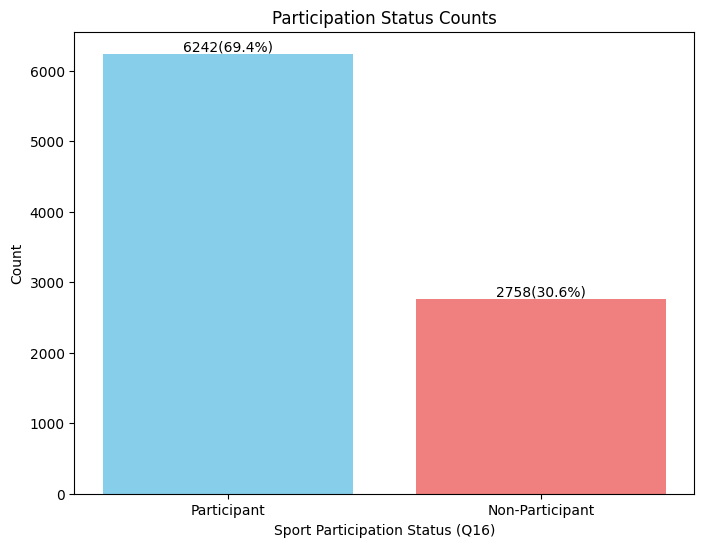

In [ ]:
# prompt: bar plots for part_count vs. notpart_count, with data label and percentage

import matplotlib.pyplot as plt

# Data
labels = ['Participant', 'Non-Participant']
counts = [part_count, notpart_count]
percentages = [f'{count / sum(counts) * 100:.1f}%' for count in counts]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = plt.bar(labels, counts, color=['skyblue', 'lightcoral'])

# Add data labels and percentages above the bars
for bar, percentage in zip(bars, percentages):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}({percentage})', ha='center', va='bottom')


plt.xlabel('Sport Participation Status (Q16)')
plt.ylabel('Count')
plt.title('Participation Status Counts')
plt.show()

In [ ]:
part_df = df[df['Q16'] != 1]
nonpart_df = df[df['Q16'] == 1]

In [ ]:
# prompt: average of column 'Q1' between part_df vs. nonpart_df

# Calculate the average of 'Q1' for participants and non-participants
avg_q1_part = part_df['Q1'].mean()
avg_q1_notpart = nonpart_df['Q1'].mean()

print(f"Average of 'Q1' for participants: {avg_q1_part}")
print(f"Average of 'Q1' for non-participants: {avg_q1_notpart}")

Average of 'Q1' for participants: 3.8646267222044215
Average of 'Q1' for non-participants: 3.6142131979695433


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(column_name):
    plt.figure(figsize=(12, 6))

    # Plot for participants
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=column_name, data=part_df)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} (Participants)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Adding data labels with percentage values for participants
    total_part = len(part_df)
    for p in ax1.patches:
        percentage = f'{100 * p.get_height() / total_part:.1f}%'
        ax1.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

    # Plot for non-participants
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=column_name, data=nonpart_df)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} (Non-Participants)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

    # Adding data labels with percentage values for non-participants
    total_nonpart = len(nonpart_df)
    for p in ax2.patches:
        percentage = f'{100 * p.get_height() / total_nonpart:.1f}%'
        ax2.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

    # Set the y-axis range to match for both plots
    max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
    ax1.set_ylim(0, max_y)
    ax2.set_ylim(0, max_y)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_dist('Q1')  # Replace 'Q1' with the column you want to analyze



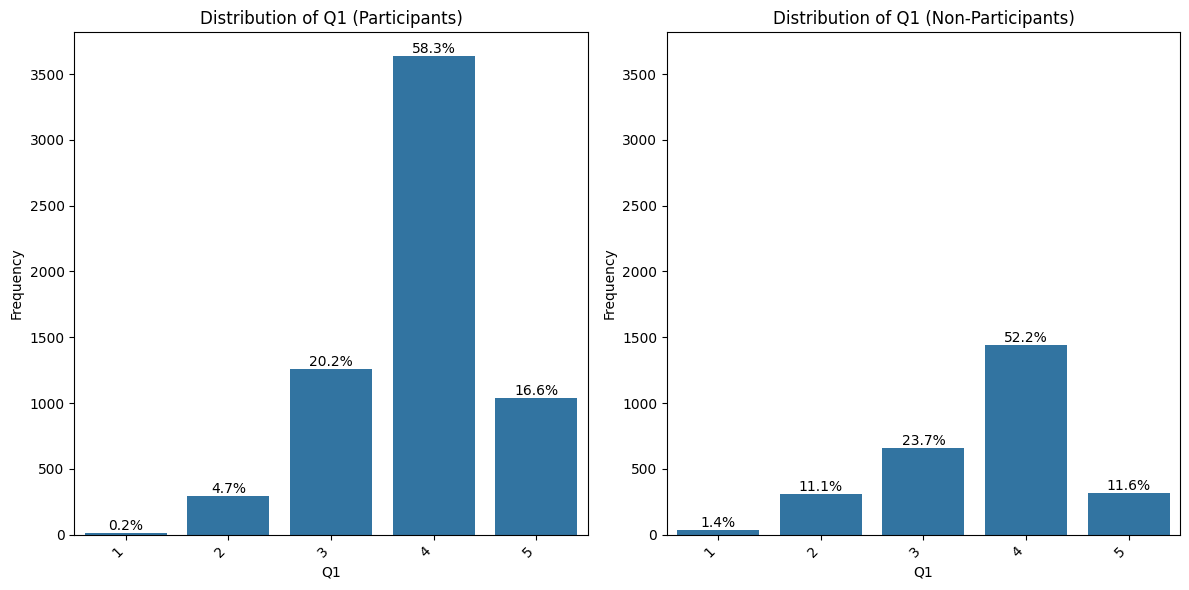

In [ ]:
plot_dist('Q1')

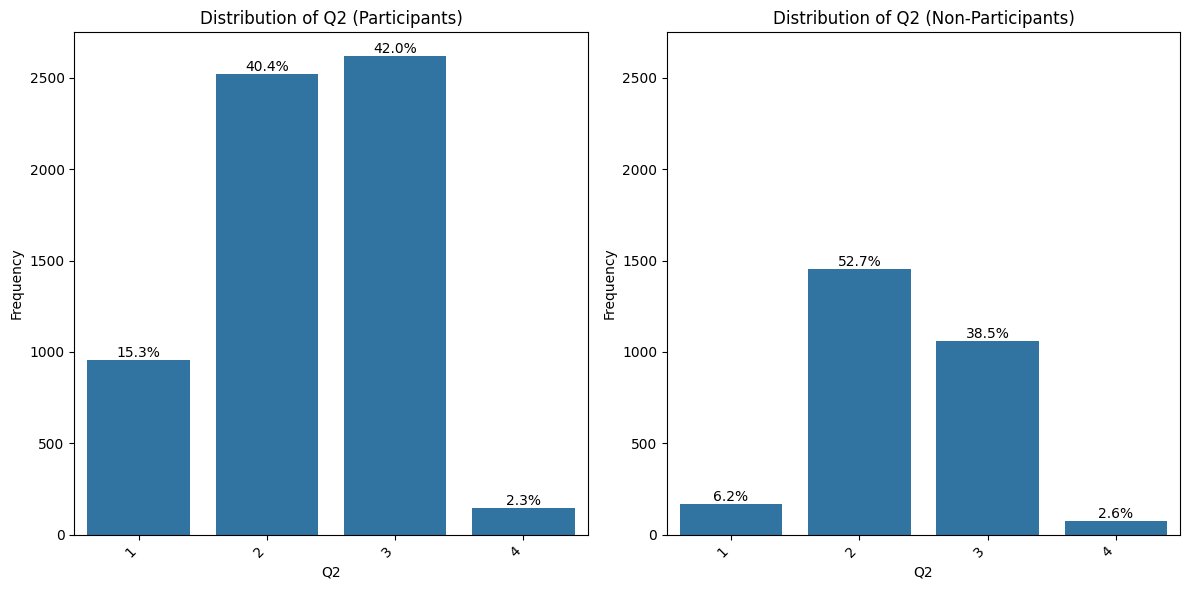

In [ ]:
plot_dist('Q2')

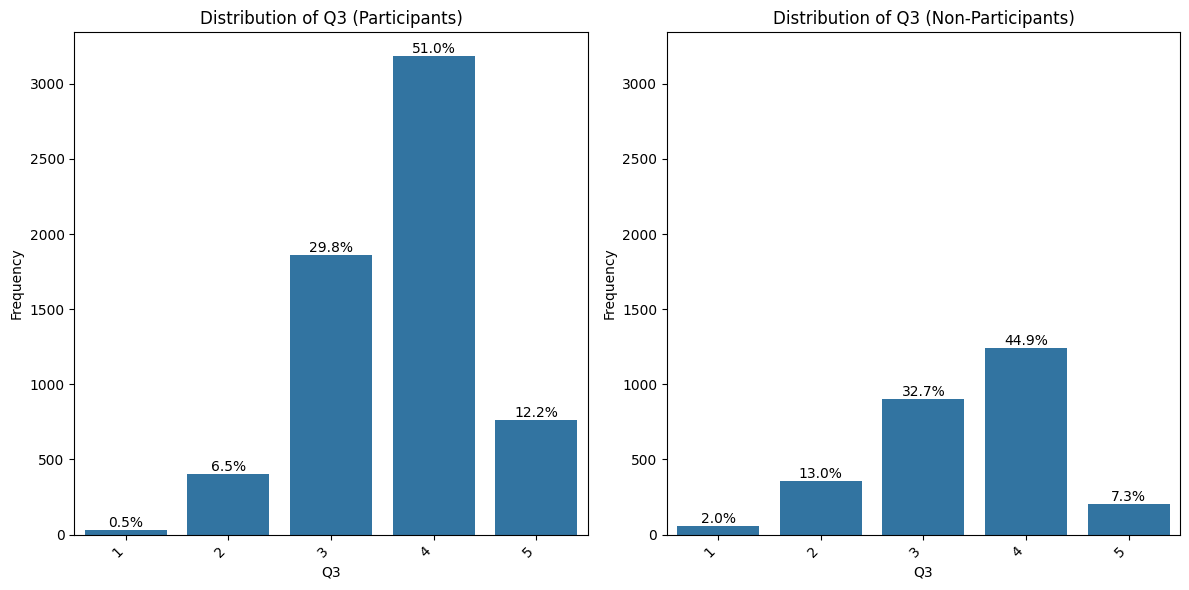

In [ ]:
plot_dist('Q3')

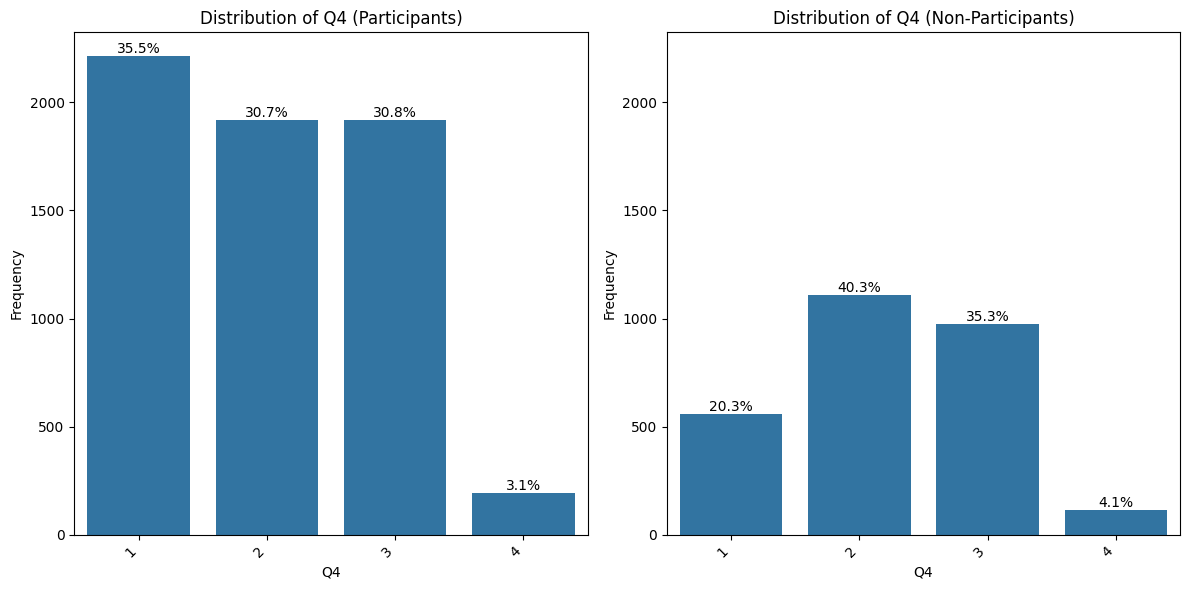

In [ ]:
plot_dist('Q4')

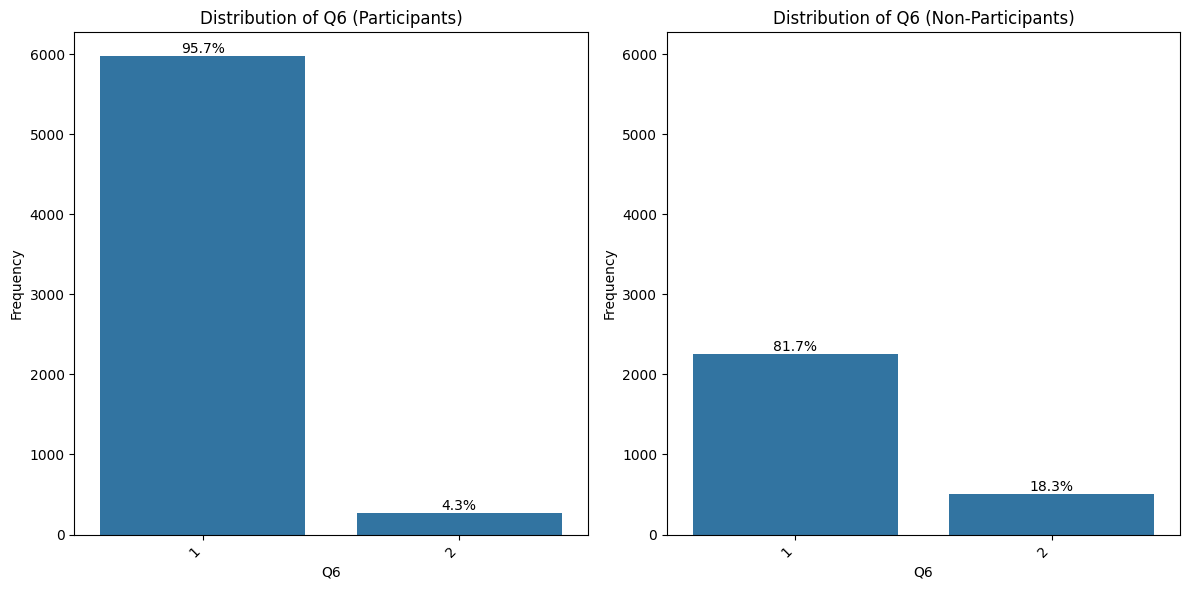

In [ ]:
plot_dist('Q6')

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# # If you're using macOS
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'NanumGothic'
# # Preventing minus sign issues
# plt.rcParams['axes.unicode_minus'] = False
# print(plt.rcParams['font.family'])

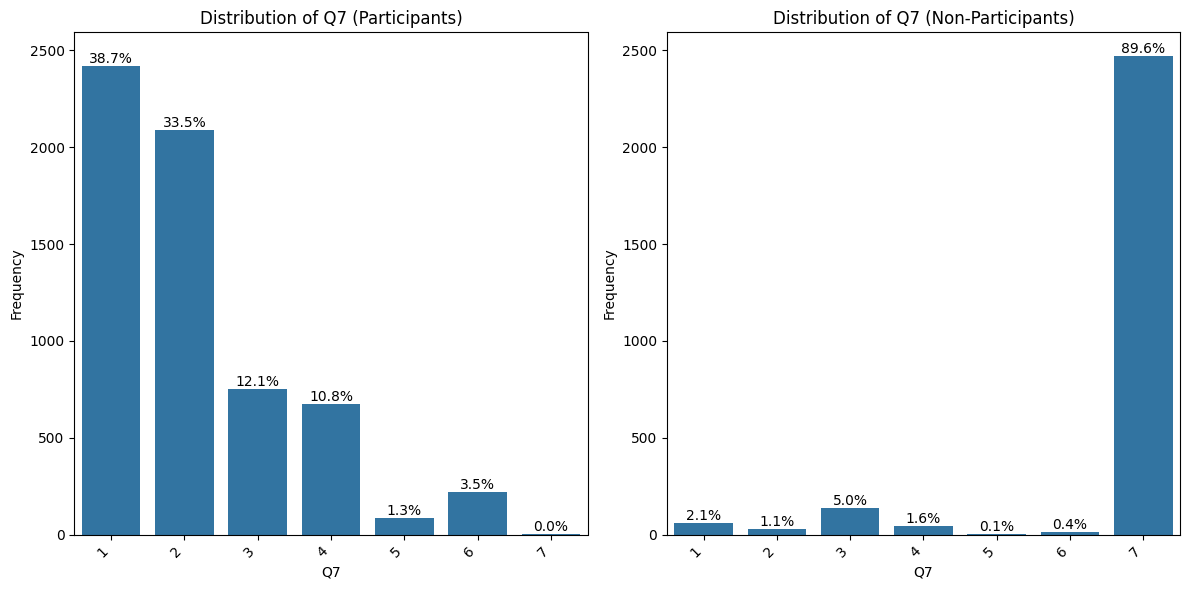

In [ ]:
plot_dist('Q7')

In [ ]:
# prompt: part_df, sort by frequency of Q17_1_1, show top 10

# Sort part_df by the frequency of 'Q17_1_1' and display the top 10
top_10_q17 = part_df['Q17_1_1'].value_counts().nlargest(10)
top_10_q17

,count
Q17_1_1,
402.0,1707
404.0,870
405.0,375
102.0,374
601.0,351
106.0,332
408.0,283
117.0,263
120.0,222


In [ ]:
# prompt: translate korean of translate korean of set(df['XA17011']) in English

print(set(df['XA17011']))
# Creating a dictionary with Korean elements and their English translations
translations = {
    '점핑': 'Jumping',
    '탁구': 'Table Tennis',
    '스노우보드, 스키': 'Snowboarding, Skiing',
    '태권도': 'Taekwondo',
    '체조(맨손체조, 생활체조)': 'Gymnastics (Free Gymnastics, Recreational Gymnastics)',
    '마을회관운동': 'Community Center Exercise',
    '훌라후프': 'Hula Hoop',
    '야구': 'Baseball',
    '빙상(아이스하키, 스케이팅 포함)': 'Ice Sports (including Ice Hockey, Skating)',
    '볼링': 'Bowling',
    '게이트볼': 'Gateball',
    '댄스스포츠': 'Dance Sports',
    '아쿠아로빅, 수중발레': 'Aquarobics, Water Ballet',
    '수상스키, 웨이크보드, 윈드서핑': 'Water Skiing, Wakeboarding, Windsurfing',
    '배구': 'Volleyball',
    '스쿼시': 'Squash',
    '테니스': 'Tennis',
    '아파트내운동기구': 'Apartment Gym Equipment',
    '골프(그라운드, 파크 포함)': 'Golf (including Ground Golf, Park Golf)',
    '수영': 'Swimming',
    '플로어볼': 'Floorball',
    '레슬링': 'Wrestling',
    '야외간이운동기구': 'Outdoor Exercise Equipment',
    '마라톤': 'Marathon',
    '래프팅': 'Rafting',
    '승마': 'Horse Riding',
    '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)': 'Aerial Leisure (Skydiving, Paragliding, Hang Gliding, etc.)',
    '족구': 'Foot Volleyball',
    '낚시': 'Fishing',
    '검도': 'Kendo',
    '격투기(킥복싱, 이종격투기)': 'Martial Arts (Kickboxing, Mixed Martial Arts)',
    '인라인하키, 필드하키': 'Inline Hockey, Field Hockey',
    '사격': 'Shooting',
    '육상(걷기, 마라톤 제외)': 'Track and Field (excluding Walking, Marathon)',
    '유도': 'Judo',
    '근력운동': 'Strength Training',
    '럭비, 미식축구': 'Rugby, American Football',
    '배드민턴': 'Badminton',
    '방송댄스': 'Broadcast Dance',
    '걷기(조깅, 속보)': 'Walking (Jogging, Speed Walking)',
    '공원운동기구': 'Park Exercise Equipment',
    '무도(유도, 검도, 태권도 제외)': 'Martial Arts (excluding Judo, Kendo, Taekwondo)',
    '보디빌딩(헬스)': 'Bodybuilding (Fitness)',
    '인라인스케이트': 'Inline Skating',
    '폴댄스': 'Pole Dance',
    '핸드볼': 'Handball',
    '소프트볼': 'Softball',
    '축구, 풋살': 'Soccer, Futsal',
    '권투': 'Boxing',
    'k팝댄스': 'K-pop Dance',
    '줄넘기': 'Jump Rope',
    '야외운동기구': 'Outdoor Exercise Equipment',
    '에어로빅': 'Aerobics',
    '라켓볼': 'Racquetball',
    '자전거, 사이클, 산악자전거': 'Bicycling, Cycling, Mountain Biking',
    '요가, 필라테스, 태보': 'Yoga, Pilates, Tae Bo',
    '당구, 포켓볼': 'Billiards, Pool',
    '암벽등반': 'Rock Climbing',
    '등산': 'Hiking',
    '농구': 'Basketball'
    # float('nan'): 'NaN'  # Handling NaN values if needed
}

{'점핑', '탁구', '스노우보드, 스키', '태권도', '체조(맨손체조, 생활체조)', '마을회관운동', '훌라후프', '야구', '빙상(아이스하키, 스케이팅 포함)', '볼링', '게이트볼', '댄스스포츠', '아쿠아로빅, 수중발레', '수상스키, 웨이크보드, 윈드서핑', '배구', '스쿼시', '테니스', '아파트내운동기구', '골프(그라운드, 파크 포함)', '수영', '플로어볼', '레슬링', '야외간이운동기구', '마라톤', '래프팅', '승마', '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)', '족구', '낚시', '검도', '격투기(킥복싱, 이종격투기)', '인라인하키, 필드하키', '사격', '육상(걷기, 마라톤 제외)', '유도', '근력운동', '럭비, 미식축구', '배드민턴', '방송댄스', '걷기(조깅, 속보)', '공원운동기구', '무도(유도, 검도, 태권도 제외)', '보디빌딩(헬스)', '인라인스케이트', '폴댄스', '핸드볼', '소프트볼', '축구, 풋살', '권투', 'k팝댄스', '줄넘기', '야외운동기구', '에어로빅', '라켓볼', '자전거, 사이클, 산악자전거', '요가, 필라테스, 태보', '당구, 포켓볼', '암벽등반', nan, '등산', '농구'}


In [ ]:
# Example usage: translating each unique element in the set
df['XA17011_translated'] = df['XA17011'].map(translations)

# Printing the translated elements
print(df['XA17011_translated'])


0                             Basketball
1                                    NaN
2                                    NaN
3                                    NaN
4                                    NaN
                      ...               
8995    Walking (Jogging, Speed Walking)
8996                                 NaN
8997                                 NaN
8998                                 NaN
8999    Walking (Jogging, Speed Walking)
Name: XA17011_translated, Length: 9000, dtype: object


In [ ]:
print(df['XA17011'].isnull().sum())
print(df['XA17011_translated'].isnull().sum())

2763
2763


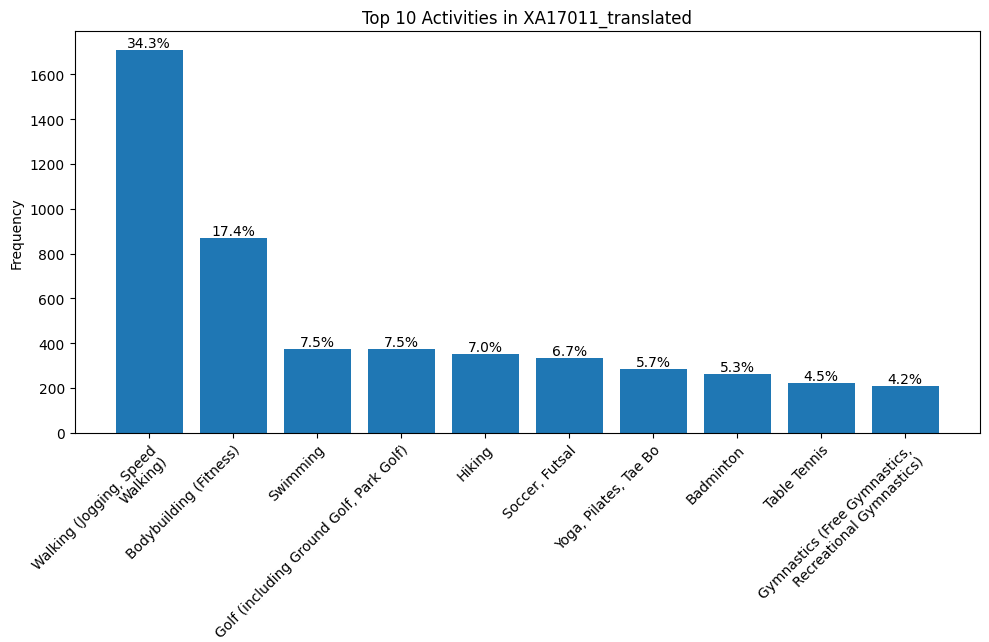

In [ ]:
# Count the frequency of each activity
activity_counts = df['XA17011_translated'].value_counts().head(10)

# Calculate percentages
total = activity_counts.sum()
percentages = (activity_counts / total) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(activity_counts.index, activity_counts.values)

# Add data labels with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )

plt.title('Top 10 Activities in XA17011_translated')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.tight_layout()
plt.show()

In [ ]:
!pwd

/Users/agathos/DtotheS/sport_analytics/dr_oh/sports_survey


# Read all data and store to dic

In [ ]:
import pandas as pd
import os

# Path to the folder containing the Excel files
data_folder = "data"

# Generate a list of file names for 2012 to 2023
file_list = [os.path.join(data_folder, f'{year}rawdata.xlsx') for year in range(2012, 2024)]

# Dictionary to store DataFrames for each sheet in each file
data_dict = {}

# Iterate through each file
for file in file_list:
    # Load the Excel file
    xl = pd.ExcelFile(file)
    print(f"{file}: {xl.sheet_names}")  # Print the sheet names for reference

    # Iterate through each sheet in the file
    for sheet in xl.sheet_names:
        # Create a key for the dictionary with the format 'Year_SheetName'
        year = os.path.basename(file).split('rawdata')[0]  # Extract the year from the filename
        key = f'{year}_{sheet}'
        # Read the sheet into a DataFrame and store it in the dictionary
        data_dict[key] = pd.read_excel(xl, sheet_name=sheet)

data/2012rawdata.xlsx: ['Data']
data/2013rawdata.xlsx: ['Sheet1']
data/2014rawdata.xlsx: ['2014 국민생활체육참여실태조사 rawdata']
data/2015rawdata.xlsx: ['2015 국민생활체육참여실태조사 rawdata']
data/2016rawdata.xlsx: ['Sheet1']
data/2017rawdata.xlsx: ['Sheet1']
data/2018rawdata.xlsx: ['2018 국민생활체육 참여실태조사 원자료', '항목정의서', '코드정의서']
data/2019rawdata.xlsx: ['DATA', 'DATA(변수값)', '변수설명', 'CODEBOOK']
data/2020rawdata.xlsx: ['DATA', 'DATA(변수값)', '변수가이드', '코드정의서']
data/2021rawdata.xlsx: ['DATA', 'DATA(값)', '변수']
data/2022rawdata.xlsx: ['DATA', 'DATA(값)', '변수']
data/2023rawdata.xlsx: ['DATA_2023']


In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
# Save the dictionary to a pickle file
with open('data_dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print("Dictionary has been stored in 'data_dict.pkl'.")

Dictionary has been stored in 'data_dict.pkl'.
Dictionary has been loaded from 'data_dict.pkl'.


In [ ]:
with open('data_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

print("Dictionary has been loaded from 'data_dict.pkl'.")

Dictionary has been loaded from 'data_dict.pkl'.


In [ ]:
def add_rows(df, foo):
    df = pd.concat([df, foo], ignore_index=True)
    return df

# Preprocess each year's data

## 2023 Data Preprocessing

In [ ]:
data_dict['2023_DATA_2023'].iloc[:10,120:140]

,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 중분류) _ 1순위_BASE: 규칙적 체육활동 참여자,기타,주로 참여하는 체육활동 (참여 빈도) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (참여 요일) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (주 시간대) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (1회 평균 참여시간) _ 시간,주로 참여하는 체육활동 (1회 평균 참여시간) _ 분,주로 참여하는 체육활동 (최근 1년간 참여 기간) _ 1순위_BASE: 규칙적 체육...,주로 참여하는 체육활동 (참여 강도) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (주 이용시설) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (이동 수단) _ 1순위_BASE: 규칙적 체육활동 참여자,기타,주로 참여하는 체육활동 (소요 시간(시)) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (소요 시간(분)) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (종목 : 중분류) _ 2순위_BASE: 규칙적 체육활동 참여자,기타,주로 참여하는 체육활동 (참여 빈도) _ 2순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (참여 요일) _ 2순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (주 시간대) _ 2순위_BASE: 규칙적 체육활동 참여자
1,Q16,Q17_1_1,XA17011,Q17_2_1,Q17_3_1,Q17_4_1,Q17_5_11,Q17_5_12,Q17_6_1,Q17_7_1,Q17_8_1,Q17_9_1,Q17_9_1_etc,Q17_10_11,Q17_10_12,Q17_1_2,XA17012,Q17_2_2,Q17_3_2,Q17_4_2
2,3,103,농구,2,2,4,1,0,6,2,4,1,NaN,0,3,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,103,농구,2,2,4,1,30,12,2,4,1,NaN,0,10,NaN,NaN,NaN,NaN,NaN
8,3,103,농구,2,2,4,1,30,12,2,4,1,NaN,0,6,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_li=[0,3,5,8,120,121,122]
foo2023 = data_dict['2023_DATA_2023'].iloc[2:,col_li]
foo2023['data_year'] = 2023
foo2023

,Unnamed: 0,Unnamed: 3,Unnamed: 5,Unnamed: 8,Unnamed: 120,Unnamed: 121,Unnamed: 122,data_year
2,2256,서울특별시,1,17,3,103,농구,2023
3,2214,서울특별시,1,17,1,NaN,NaN,2023
4,2265,서울특별시,1,16,1,NaN,NaN,2023
5,62,서울특별시,1,17,1,NaN,NaN,2023
6,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
8997,20230,제주특별자치도,2,76,9,402,"걷기(조깅, 속보)",2023
8998,20227,제주특별자치도,2,73,1,NaN,NaN,2023
8999,20199,제주특별자치도,2,73,1,NaN,NaN,2023
9000,20206,제주특별자치도,2,85,1,NaN,NaN,2023


In [ ]:
col_name = ['id','area1','gender','age','sport_part','sport1','sport1_kor','data_year']

In [ ]:
df = pd.DataFrame(columns=col_name)

In [ ]:
foo2023.columns = col_name

In [ ]:
df = pd.concat([df, foo2023], ignore_index=True)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
8995,20230,제주특별자치도,2,76,9,402,"걷기(조깅, 속보)",2023
8996,20227,제주특별자치도,2,73,1,NaN,NaN,2023
8997,20199,제주특별자치도,2,73,1,NaN,NaN,2023
8998,20206,제주특별자치도,2,85,1,NaN,NaN,2023


## 2022



In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2022_DATA(값)'].iloc[:10,109:120]

,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (참여 빈도) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (참여 요일) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (주 시간대) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (1회 평균 참여시간) _ 시간,주로 참여하는 체육활동 (1회 평균 참여시간) _ 분,주로 참여하는 체육활동 (최근 1년간 참여 기간) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (참여 강도) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (주 이용시설) _ 1순위_BASE: 규칙적 체육활동 참여자,주로 참여하는 체육활동 (이동 수단) _ 1순위_BASE: 규칙적 체육활동 참여자
0,A16,A17011,A17021,A17031,A17041,A170511,A170512,A17061,A17071,A17081,A17091
1,일주일에 2번,수영,일주일에 2번,평일,저녁(18시~22시),1,0,12,고강도,민간체육시설,자가용 승용/승합차
2,일주일에 1번,보디빌딩(헬스),일주일에 1번,평일,저녁(18시~22시),0,50,12,중강도,자가시설,없음
3,한 달에 3번 이하,"걷기(조깅, 속보)",한 달에 3번 이하,평일,저녁(18시~22시),0,50,8,중강도,공공체육시설,도보
4,일주일에 1번,테니스,일주일에 1번,평일/휴일,저녁(18시~22시),1,20,12,고강도,민간체육시설,자가용 승용/승합차
5,일주일에 2번,수영,일주일에 2번,평일,저녁(18시~22시),1,10,11,고강도,민간체육시설,도보
6,일주일에 1번,"자전거, 사이클, 산악자전거",일주일에 1번,휴일,오전(8~12시),1,30,10,중강도,학교체육시설,자전거
7,일주일에 3번,수영,일주일에 3번,평일,오전(8~12시),1,20,12,고강도,민간체육시설,자가용 승용/승합차
8,한 달에 3번 이하,볼링,한 달에 3번 이하,평일/휴일,저녁(18시~22시),1,0,8,중강도,민간체육시설,도보
9,일주일에 1번,등산,일주일에 1번,휴일,일정하지 않음,4,0,10,중강도,공공체육시설,버스(대중교통)


In [ ]:
data_dict['2022_DATA(값)'].iloc[:10,[0,1,5,8,109,110]]

,ID,▣ 지역,▣ 성별,▣ 연령,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자
0,ID,AREA,SEX,AGE,A16,A17011
1,1,서울,여자,52,일주일에 2번,수영
2,2,서울,여자,31,일주일에 1번,보디빌딩(헬스)
3,3,서울,여자,27,한 달에 3번 이하,"걷기(조깅, 속보)"
4,4,서울,남자,32,일주일에 1번,테니스
5,5,서울,남자,44,일주일에 2번,수영
6,6,서울,남자,17,일주일에 1번,"자전거, 사이클, 산악자전거"
7,7,서울,남자,65,일주일에 3번,수영
8,8,서울,남자,55,한 달에 3번 이하,볼링
9,9,서울,여자,64,일주일에 1번,등산


In [ ]:
data_dict['2022_DATA'].iloc[:10,[0,1,5,8,109,110]]

,ID,▣ 지역,▣ 성별,▣ 연령,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자
0,ID,AREA,SEX,AGE,A16,A17011
1,1,1,2,52,4,405
2,2,1,2,31,3,404
3,3,1,2,27,2,402
4,4,1,1,32,3,116
5,5,1,1,44,4,405
6,6,1,1,17,3,410
7,7,1,1,65,5,405
8,8,1,1,55,2,113
9,9,1,2,64,3,601


In [ ]:
foo2022 = pd.DataFrame()

In [ ]:
foo2022

""


In [ ]:
foo2022 = data_dict['2022_DATA'].iloc[:,[0,1,5,8,109,110]]

In [ ]:
foo2022['▣ 지역'] = data_dict['2022_DATA(값)'].iloc[:,1]

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_1945/2778633955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2022['▣ 지역'] = data_dict['2022_DATA(값)'].iloc[:,1]


In [ ]:
foo2022 = foo2022[1:]

In [ ]:
foo2022

,ID,▣ 지역,▣ 성별,▣ 연령,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자
1,1,서울,2,52,4,405
2,2,서울,2,31,3,404
3,3,서울,2,27,2,402
4,4,서울,1,32,3,116
5,5,서울,1,44,4,405
...,...,...,...,...,...,...
8996,997076,전남,2,62,5,101
8997,997077,전남,2,74,6,402
8998,997078,전남,2,73,4,101
8999,997079,전남,1,54,2,405


In [ ]:
foo2022['sport1_kor'] = data_dict['2022_DATA(값)'].iloc[:,110]

In [ ]:
foo2022['data_year'] = 2022

In [ ]:
foo2022.columns = col_name

In [ ]:
# Data Error. 408 : 요가, 필라테스, 태보 // 402 : 걷기(조깅, 속보) & duplicated id: 50765 => remove these two
foo2022[foo2022['id'] == 50765]

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
8646,50765,전북,2,36,4,408,"걷기(조깅, 속보)",2022
8647,50765,충남,2,35,3,402,"요가, 필라테스, 태보",2022


In [ ]:
foo2022 = foo2022[foo2022['id'] != 50765]

In [ ]:
df = pd.concat([df, foo2022], ignore_index=True)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
17995,997076,전남,2,62,5,101,게이트볼,2022
17996,997077,전남,2,74,6,402,"걷기(조깅, 속보)",2022
17997,997078,전남,2,73,4,101,게이트볼,2022
17998,997079,전남,1,54,2,405,수영,2022


In [ ]:
# df[(df['data_year'] == 2022) & (df['sport1'].isna())]

## 2021

In [ ]:
foo2021 = data_dict['2021_DATA'].iloc[:,[0,2,5,8,103,104]]

In [ ]:
foo2021['sport1_kor'] = data_dict['2021_DATA(값)'].iloc[:,104]

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/3583670749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2021['sport1_kor'] = data_dict['2021_DATA(값)'].iloc[:,104]


In [ ]:
foo2021['data_year'] = 2021

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/3099853213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2021['data_year'] = 2021


In [ ]:
foo2021 = foo2021[1:]

In [ ]:
foo2021.columns = col_name

In [ ]:
df = pd.concat([df, foo2021], ignore_index=True)

In [ ]:
df['area1'][18000:] = data_dict['2021_DATA(값)'].iloc[1:,2].values

In [ ]:
df['area1'][18000:]

18000    서울
18001    서울
18002    서울
18003    서울
18004    서울
         ..
26995    제주
26996    제주
26997    제주
26998    제주
26999    제주
Name: area1, Length: 9000, dtype: object

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
26995,21996,제주,1,56,1,NaN,NaN,2021
26996,21997,제주,1,46,5,202,검도,2021
26997,21998,제주,1,60,5,402,"걷기(조깅, 속보)",2021
26998,21999,제주,2,54,3,402,"걷기(조깅, 속보)",2021


## 2020

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2020_DATA(변수값)'].iloc[:,208:210]

,귀하께서는 최근 1년간 (2019 9 7 ~ 2020 9 6) 규칙적 체육활동에 얼마나 자주 참여하고 계십니까?,체육활동 종목
0,Q16,Q17_1_1
1,일주일에 3번,테니스
2,일주일에 2번,"걷기(조깅, 속보)"
3,일주일에 4번,"걷기(조깅, 속보)"
4,일주일에 6번,"걷기(조깅, 속보)"
...,...,...
8996,일주일에 5번,"걷기(조깅, 속보)"
8997,일주일에 5번,"걷기(조깅, 속보)"
8998,일주일에 6번,"걷기(조깅, 속보)"
8999,매일,"걷기(조깅, 속보)"


In [ ]:
data_dict['2020_DATA'].iloc[:,[0,4,7,9,208,209]]

,응답자 일련번호,시도,성별,연령,귀하께서는 최근 1년간 (2019 9 7 ~ 2020 9 6) 규칙적 체육활동에 얼마나 자주 참여하고 계십니까?,체육활동 종목
0,ID,SQ5_1_TEXT,SQ6,AGE,Q16,Q17_1_1
1,1,서울,2,33,5,116
2,2,서울,1,78,4,402
3,3,서울,2,46,6,402
4,4,서울,2,57,8,402
...,...,...,...,...,...,...
8996,101037,대구,2,71,7,402
8997,101038,충남,2,70,7,402
8998,101040,대구,2,74,8,402
8999,101041,전남,2,75,9,402


In [ ]:
foo2020 = data_dict['2020_DATA'].iloc[:,[0,4,7,9,208,209]]

In [ ]:
foo2020

,응답자 일련번호,시도,성별,연령,귀하께서는 최근 1년간 (2019 9 7 ~ 2020 9 6) 규칙적 체육활동에 얼마나 자주 참여하고 계십니까?,체육활동 종목
0,ID,SQ5_1_TEXT,SQ6,AGE,Q16,Q17_1_1
1,1,서울,2,33,5,116
2,2,서울,1,78,4,402
3,3,서울,2,46,6,402
4,4,서울,2,57,8,402
...,...,...,...,...,...,...
8996,101037,대구,2,71,7,402
8997,101038,충남,2,70,7,402
8998,101040,대구,2,74,8,402
8999,101041,전남,2,75,9,402


In [ ]:
data_dict['2020_DATA(변수값)'].iloc[:,209]

0          Q17_1_1
1              테니스
2       걷기(조깅, 속보)
3       걷기(조깅, 속보)
4       걷기(조깅, 속보)
           ...    
8996    걷기(조깅, 속보)
8997    걷기(조깅, 속보)
8998    걷기(조깅, 속보)
8999    걷기(조깅, 속보)
9000    걷기(조깅, 속보)
Name: 체육활동 종목, Length: 9001, dtype: object

In [ ]:
foo2020['sport1_kor'] = data_dict['2020_DATA(변수값)'].iloc[:,209]

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/4270992159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2020['sport1_kor'] = data_dict['2020_DATA(변수값)'].iloc[:,209]


In [ ]:
foo2020['dyear'] = 2020

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2901224087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2020['dyear'] = 2020


In [ ]:
foo2020 = foo2020[1:]

In [ ]:
foo2020.columns = col_name

In [ ]:
foo2020

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
1,1,서울,2,33,5,116,테니스,2020
2,2,서울,1,78,4,402,"걷기(조깅, 속보)",2020
3,3,서울,2,46,6,402,"걷기(조깅, 속보)",2020
4,4,서울,2,57,8,402,"걷기(조깅, 속보)",2020
5,5,서울,1,56,6,404,보디빌딩(헬스),2020
...,...,...,...,...,...,...,...,...
8996,101037,대구,2,71,7,402,"걷기(조깅, 속보)",2020
8997,101038,충남,2,70,7,402,"걷기(조깅, 속보)",2020
8998,101040,대구,2,74,8,402,"걷기(조깅, 속보)",2020
8999,101041,전남,2,75,9,402,"걷기(조깅, 속보)",2020


In [ ]:
df = add_rows(df,foo2020)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
35995,101037,대구,2,71,7,402,"걷기(조깅, 속보)",2020
35996,101038,충남,2,70,7,402,"걷기(조깅, 속보)",2020
35997,101040,대구,2,74,8,402,"걷기(조깅, 속보)",2020
35998,101041,전남,2,75,9,402,"걷기(조깅, 속보)",2020


## 2019

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2019_DATA'].iloc[:,114:116]

,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자
0,Q16,Q17011
1,3,411
2,7,106
3,7,103
4,3,103
...,...,...
8996,5,402
8997,4,402
8998,3,402
8999,4,402


In [ ]:
data_dict['2019_DATA'].iloc[:,[0,2,7,9,114,115]]

,응답자 일련번호,시도,▣ 성 별,▣ 연 령,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자
0,ID,시도,SEX,AGE,Q16,Q17011
1,1,01. 서울특별시,1,17,3,411
2,2,01. 서울특별시,1,17,7,106
3,3,01. 서울특별시,1,13,7,103
4,4,01. 서울특별시,1,15,3,103
...,...,...,...,...,...,...
8996,20938,17. 제주특별자치도,2,64,5,402
8997,20939,17. 제주특별자치도,1,71,4,402
8998,20940,17. 제주특별자치도,2,33,3,402
8999,20941,17. 제주특별자치도,2,33,4,402


In [ ]:
foo2019 = data_dict['2019_DATA'].iloc[:,[0,2,7,9,114,115]]

In [ ]:
data_dict['2019_DATA(변수값)'].iloc[:,115]

0           Q17011
1              줄넘기
2           축구, 풋살
3               농구
4               농구
           ...    
8996    걷기(조깅, 속보)
8997    걷기(조깅, 속보)
8998    걷기(조깅, 속보)
8999    걷기(조깅, 속보)
9000    걷기(조깅, 속보)
Name: 주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자, Length: 9001, dtype: object

In [ ]:
foo2019['sport1_kor'] = data_dict['2019_DATA(변수값)'].iloc[:,115]

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/3076527538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2019['sport1_kor'] = data_dict['2019_DATA(변수값)'].iloc[:,115]


In [ ]:
foo2019['dyear'] = 2019

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/3185466719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2019['dyear'] = 2019


In [ ]:
foo2019

,응답자 일련번호,시도,▣ 성 별,▣ 연 령,최근 1년간 규칙적 체육활동 참여 빈도,주로 참여하는 체육활동 (종목 : 소분류) _ 1순위_BASE: 규칙적 체육활동 참여자,sport1_kor,dyear
0,ID,시도,SEX,AGE,Q16,Q17011,Q17011,2019
1,1,01. 서울특별시,1,17,3,411,줄넘기,2019
2,2,01. 서울특별시,1,17,7,106,"축구, 풋살",2019
3,3,01. 서울특별시,1,13,7,103,농구,2019
4,4,01. 서울특별시,1,15,3,103,농구,2019
...,...,...,...,...,...,...,...,...
8996,20938,17. 제주특별자치도,2,64,5,402,"걷기(조깅, 속보)",2019
8997,20939,17. 제주특별자치도,1,71,4,402,"걷기(조깅, 속보)",2019
8998,20940,17. 제주특별자치도,2,33,3,402,"걷기(조깅, 속보)",2019
8999,20941,17. 제주특별자치도,2,33,4,402,"걷기(조깅, 속보)",2019


In [ ]:
foo2019.columns = col_name

In [ ]:
foo2019 = foo2019[1:]

In [ ]:
foo2019

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
1,1,01. 서울특별시,1,17,3,411,줄넘기,2019
2,2,01. 서울특별시,1,17,7,106,"축구, 풋살",2019
3,3,01. 서울특별시,1,13,7,103,농구,2019
4,4,01. 서울특별시,1,15,3,103,농구,2019
5,5,01. 서울특별시,1,16,2,106,"축구, 풋살",2019
...,...,...,...,...,...,...,...,...
8996,20938,17. 제주특별자치도,2,64,5,402,"걷기(조깅, 속보)",2019
8997,20939,17. 제주특별자치도,1,71,4,402,"걷기(조깅, 속보)",2019
8998,20940,17. 제주특별자치도,2,33,3,402,"걷기(조깅, 속보)",2019
8999,20941,17. 제주특별자치도,2,33,4,402,"걷기(조깅, 속보)",2019


In [ ]:
df = add_rows(df,foo2019)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
44995,20938,17. 제주특별자치도,2,64,5,402,"걷기(조깅, 속보)",2019
44996,20939,17. 제주특별자치도,1,71,4,402,"걷기(조깅, 속보)",2019
44997,20940,17. 제주특별자치도,2,33,3,402,"걷기(조깅, 속보)",2019
44998,20941,17. 제주특별자치도,2,33,4,402,"걷기(조깅, 속보)",2019


## 2018

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2018_2018 국민생활체육 참여실태조사 원자료'].iloc[:,325:]

,Q16 귀하께서는 최근 1년간(2017.9.19.-2018.9.18.) 규칙적 체육활동에 얼마나 자주 참여하고 계십니까?,Q17-1S 1) 체육활동 종목,Q17-1S 2) 참여 빈도,Q17-1S 3) 참여 요일,Q17-1S 4) 주 시간대,Q17-1S (시간)5) 1회 평균 참여시간,Q17-1S (분)5) 1회 평균 참여시간,Q17-1S 1회 평균 참여시간(분),Q17-1S 6) 최근 1년간 참여기간,Q17-1S 7) 참여강도,...,도시규모,◎지 역 별,◎도 시 규 모 별,◎성 별,◎연 령 별,◎성 / 연 령 별,◎학 력 별,◎소 득 별,◎직 업 별,가중치
0,Q16,Q17_1A,Q17_1B,Q17_1C,Q17_1D,Q17_1E1,Q17_1E2,Q17_1E,Q17_1F,Q17_1G,...,SCA,D_AREA,D_SCA,D_SEX,D_AGE,D_SEXAGE,D_DQ1,D_DQ3,D_DQ4,WT
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,11,1,1,3,13,5,7,4,8873.953775
2,3,402,2,3,4,1,0,60,12,2,...,3,11,1,1,6,16,3,2,13,6393.28757
3,4,402,3,3,4,0,40,40,12,2,...,3,11,1,2,4,24,3,7,11,8448.016451
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,11,1,1,2,12,5,8,3,4550.911446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,2,601,1,2,6,2,0,120,12,2,...,2,36,2,1,6,16,3,8,3,2086.110323
8997,7,408,6,1,5,1,0,60,10,2,...,2,36,2,2,2,22,3,10,12,6652.893202
8998,5,404,4,1,5,0,50,50,12,2,...,2,36,2,2,4,24,3,11,5,3646.008077
8999,4,410,3,3,6,1,0,60,12,2,...,2,36,2,2,5,25,3,8,5,2067.376871


In [ ]:
foo2018 = data_dict['2018_2018 국민생활체육 참여실태조사 원자료'].iloc[:,[0,423,421,422,325,326]]

In [ ]:
foo2018.columns = col_name[:6]

In [ ]:
foo2018

,id,area1,gender,age,sport_part,sport1
0,ID,AREA,SEX,AGE,Q16,Q17_1A
1,1,11,1,36,1,NaN
2,2,11,1,65,3,402
3,3,11,2,45,4,402
4,4,11,1,26,1,NaN
...,...,...,...,...,...,...
8996,8996,36,1,62,2,601
8997,8997,36,2,20,7,408
8998,8998,36,2,46,5,404
8999,8999,36,2,54,4,410


In [ ]:
# Create the mapping dictionary
sport_mapping = {
    101: "게이트볼", 102: "골프", 103: "농구", 104: "배구", 105: "럭비, 미식축구", 106: "축구, 풋살",
    107: "족구", 108: "핸드볼", 109: "야구", 110: "소프트볼", 111: "수구", 112: "당구, 포켓볼",
    113: "볼링", 114: "인라인 하키, 필드하키", 115: "라켓볼", 116: "테니스", 117: "배드민턴", 118: "스쿼시",
    119: "정구", 120: "탁구", 121: "구기및 라켓류 그외 종목", 201: "유도", 202: "검도", 203: "태권도",
    204: "무도", 205: "격투기", 206: "레슬링", 207: "권투", 208: "펜싱", 209: "무도/ 격투기 그외 종목",
    301: "석궁, 양궁, 국궁", 302: "씨름", 303: "민속 스포츠 그외 종목", 401: "마라톤", 402: "걷기",
    403: "육상", 404: "보디빌딩", 405: "수영", 406: "아쿠아 로빅, 수중발레", 407: "에어로빅",
    408: "요가, 필라테스 ,태보", 409: "댄스 스포츠", 410: "자전거, 사이클, 산악 자전거", 411: "줄넘기",
    412: "체조", 413: "훌라후프", 414: "체력단련 및 생활운동 그외 종목", 501: "빙상", 502: "사격",
    503: "서바이벌", 504: "스노우 보드, 스키", 505: "승마", 506: "암벽등반", 507: "인라인 스케이트",
    508: "트라이 애스론", 509: "항공레저", 510: "래프팅", 511: "수상스키 ,웨이크 보드, 윈드서핑",
    512: "스킨 스쿠버", 513: "카누", 514: "요트", 515: "레저 스포츠 그외 종목", 601: "등산",
    602: "낚시", 603: "기타 스포츠 그외 종목", 9998: "없다", 9999: "모름/ 무응답"
}

# Assign values
foo2018['sport1_kor'] = foo2018['sport1'].apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan)

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2808239583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2018['sport1_kor'] = foo2018['sport1'].apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan)


In [ ]:
# Verify
print(foo2018['sport1'].isna().sum() == foo2018['sport1_kor'].isna().sum())
print((foo2018['sport1_kor'] == 'Unknown').sum()) #1 for the first line

True
1


In [ ]:
foo2018['data_year'] = 2018

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/3291106740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2018['data_year'] = 2018


In [ ]:
foo2018 = foo2018[1:]

In [ ]:
foo2018

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
1,1,11,1,36,1,NaN,NaN,2018
2,2,11,1,65,3,402,걷기,2018
3,3,11,2,45,4,402,걷기,2018
4,4,11,1,26,1,NaN,NaN,2018
5,5,11,2,34,5,408,"요가, 필라테스 ,태보",2018
...,...,...,...,...,...,...,...,...
8996,8996,36,1,62,2,601,등산,2018
8997,8997,36,2,20,7,408,"요가, 필라테스 ,태보",2018
8998,8998,36,2,46,5,404,보디빌딩,2018
8999,8999,36,2,54,4,410,"자전거, 사이클, 산악 자전거",2018


In [ ]:
df = add_rows(df,foo2018)

In [ ]:
df.to_csv('output2018.csv', index=False, encoding='utf-8-sig')

## 2017

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2017_Sheet1']

,ID,CITY,AREA,GENDER,AGE1,AGE2,SUR,Q1,Q2,Q3,...,DQ2_1,DQ2_2,DQ2_2A,DQ2_3,DQ3A,DQ3,DQ4,DQ4A,DQ4_1,WT
0,4,1,1,1,1953,63,2,3,1,3,...,1,3,NaN,3,470,9,1,8.0,NaN,4617.418514
1,16,1,1,1,1973,44,1,3,2,3,...,1,4,NaN,3,530,10,1,3.0,NaN,14452.490046
2,21,1,1,1,1954,63,1,3,3,2,...,1,4,NaN,3,520,10,1,9.0,NaN,5544.332901
3,40,1,1,2,1962,55,1,3,2,3,...,1,4,NaN,3,500,10,1,5.0,NaN,9783.165898
4,49,1,1,1,1979,38,1,4,2,4,...,1,3,NaN,2,380,7,1,3.0,NaN,7251.189671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8995,2,17,2,1964,53,1,4,3,4,...,1,4,NaN,3,340,6,2,NaN,1.0,1639.879012
8996,8992,2,17,1,1971,45,2,4,2,4,...,1,4,NaN,5,650,12,1,6.0,NaN,1426.636038
8997,8991,2,17,1,1992,25,1,4,3,3,...,2,3,NaN,1,300,6,2,NaN,2.0,1422.793739
8998,8993,2,17,1,1962,55,1,3,3,4,...,1,2,NaN,3,230,4,1,6.0,NaN,760.867471


In [ ]:
data_dict['2017_Sheet1'].iloc[:,[0,2,3,5,91,176]] # used "CITY" column for area1 column.

,ID,AREA,GENDER,AGE2,Q16,Q18_1A1
0,4,1,1,63,2,601.0
1,16,1,1,44,5,112.0
2,21,1,1,63,3,106.0
3,40,1,2,55,1,NaN
4,49,1,1,38,3,107.0
...,...,...,...,...,...,...
8995,8995,17,2,53,4,402.0
8996,8992,17,1,45,2,106.0
8997,8991,17,1,25,1,NaN
8998,8993,17,1,55,3,117.0


In [ ]:
foo2017 = data_dict['2017_Sheet1'].iloc[:,[0,2,3,5,91,176]]

In [ ]:
foo2017['Q18_1A1'].astype('Int64')

0        601
1        112
2        106
3       <NA>
4        107
        ... 
8995     402
8996     106
8997    <NA>
8998     117
8999    <NA>
Name: Q18_1A1, Length: 9000, dtype: Int64

In [ ]:
# Assign values
foo2017['sport1_kor'] = foo2017['Q18_1A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 have the same code for sports

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2342542875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2017['sport1_kor'] = foo2017['Q18_1A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 have the same code for sports


In [ ]:
foo2017['dye'] = 2017

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/870966956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2017['dye'] = 2017


In [ ]:
foo2017.columns = col_name

In [ ]:
# Verify
print(foo2017['sport1'].isna().sum() == foo2017['sport1_kor'].isna().sum())
print((foo2017['sport1_kor'] == 'Unknown').sum())

True
0


In [ ]:
df = add_rows(df,foo2017)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
62995,8995,2,2,53,4,402.0,걷기,2017
62996,8992,2,1,45,2,106.0,"축구, 풋살",2017
62997,8991,2,1,25,1,NaN,NaN,2017
62998,8993,2,1,55,3,117.0,배드민턴,2017


In [ ]:
# df.to_csv('output2017.csv', index=False, encoding='utf-8-sig')

In [ ]:
foo2017

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,4,1,1,63,2,601.0,등산,2017
1,16,1,1,44,5,112.0,"당구, 포켓볼",2017
2,21,1,1,63,3,106.0,"축구, 풋살",2017
3,40,1,2,55,1,NaN,NaN,2017
4,49,1,1,38,3,107.0,족구,2017
...,...,...,...,...,...,...,...,...
8995,8995,17,2,53,4,402.0,걷기,2017
8996,8992,17,1,45,2,106.0,"축구, 풋살",2017
8997,8991,17,1,25,1,NaN,NaN,2017
8998,8993,17,1,55,3,117.0,배드민턴,2017


In [ ]:
df[df['data_year'] == 2017]

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
54000,4,1,1,63,2,601.0,등산,2017
54001,16,1,1,44,5,112.0,"당구, 포켓볼",2017
54002,21,1,1,63,3,106.0,"축구, 풋살",2017
54003,40,1,2,55,1,NaN,NaN,2017
54004,49,1,1,38,3,107.0,족구,2017
...,...,...,...,...,...,...,...,...
62995,8995,2,2,53,4,402.0,"걷기(조깅, 속보)",2017
62996,8992,2,1,45,2,106.0,"축구, 풋살",2017
62997,8991,2,1,25,1,NaN,NaN,2017
62998,8993,2,1,55,3,117.0,배드민턴,2017


In [ ]:
# df.loc[54000:62999, 'area1'] = foo2017['area1'].values

In [ ]:
# df[df['data_year']==2017]

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
54000,4,1,1,63,2,601.0,등산,2017
54001,16,1,1,44,5,112.0,"당구, 포켓볼",2017
54002,21,1,1,63,3,106.0,"축구, 풋살",2017
54003,40,1,2,55,1,NaN,NaN,2017
54004,49,1,1,38,3,107.0,족구,2017
...,...,...,...,...,...,...,...,...
62995,8995,17,2,53,4,402.0,"걷기(조깅, 속보)",2017
62996,8992,17,1,45,2,106.0,"축구, 풋살",2017
62997,8991,17,1,25,1,NaN,NaN,2017
62998,8993,17,1,55,3,117.0,배드민턴,2017


## 2016

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2016_Sheet1']

,ID,CITY,AREA,GENDER,SQ2,AGE,Q1,Q2,Q3,Q4,...,DQ4B,BA01,BA02,BA03,BA04,BA05,BA06,BA07,BA08,WT
0,1,1,11,1,18,1,4,3,4,1,...,2.0,11,1,1,1,11,2.0,12,10,3662.21
1,2,1,11,1,32,3,4,1,4,3,...,NaN,11,1,1,3,13,5.0,3,10,7689.93
2,3,1,11,1,41,4,4,3,4,1,...,NaN,11,1,1,4,14,5.0,3,10,7372.98
3,4,1,11,1,54,5,4,1,3,2,...,NaN,11,1,1,5,15,4.0,7,10,8570.00
4,5,1,11,1,61,6,4,3,4,1,...,NaN,11,1,1,6,16,3.0,9,9,8434.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,9916,2,39,1,43,4,4,3,4,3,...,NaN,39,2,1,4,14,6.0,2,12,2656.54
9008,9917,2,39,1,71,7,3,3,3,3,...,NaN,39,2,1,7,17,1.0,9,2,2847.23
9009,9918,2,39,2,42,4,3,3,3,1,...,NaN,39,2,2,4,24,2.0,4,11,1707.54
9010,9919,2,39,2,53,5,4,3,4,3,...,NaN,39,2,2,5,25,4.0,4,11,1816.22


In [ ]:
foo2016 = data_dict['2016_Sheet1'].iloc[:,[0,2,3,5,108,190]]

In [ ]:
foo2016

,ID,AREA,GENDER,AGE,Q16,Q19A1
0,1,11,1,1,5,106.0
1,2,11,1,3,8,203.0
2,3,11,1,4,5,117.0
3,4,11,1,5,4,117.0
4,5,11,1,6,9,120.0
...,...,...,...,...,...,...
9007,9916,39,1,4,2,402.0
9008,9917,39,1,7,1,NaN
9009,9918,39,2,4,1,NaN
9010,9919,39,2,5,1,NaN


In [ ]:
# Assign values
foo2016['sport1_kor'] = foo2016['Q19A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 &2016 have the same code for sports

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2846857999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2016['sport1_kor'] = foo2016['Q19A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 &2016 have the same code for sports


In [ ]:
foo2016['dy'] = 2016

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2998851957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2016['dy'] = 2016


In [ ]:
foo2016.columns = col_name

In [ ]:
# Verify
print(foo2016['sport1'].isna().sum() == foo2016['sport1_kor'].isna().sum())
print((foo2016['sport1_kor'] == 'Unknown').sum())

True
0


In [ ]:
foo2016

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,1,11,1,1,5,106.0,"축구, 풋살",2016
1,2,11,1,3,8,203.0,태권도,2016
2,3,11,1,4,5,117.0,배드민턴,2016
3,4,11,1,5,4,117.0,배드민턴,2016
4,5,11,1,6,9,120.0,탁구,2016
...,...,...,...,...,...,...,...,...
9007,9916,39,1,4,2,402.0,걷기,2016
9008,9917,39,1,7,1,NaN,NaN,2016
9009,9918,39,2,4,1,NaN,NaN,2016
9010,9919,39,2,5,1,NaN,NaN,2016


In [ ]:
df = add_rows(df,foo2016)

In [ ]:
df.to_csv('output1623.csv', index=False, encoding='utf-8-sig')

In [ ]:
foo2016

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,1,11,1,1,5,106.0,"축구, 풋살",2016
1,2,11,1,3,8,203.0,태권도,2016
2,3,11,1,4,5,117.0,배드민턴,2016
3,4,11,1,5,4,117.0,배드민턴,2016
4,5,11,1,6,9,120.0,탁구,2016
...,...,...,...,...,...,...,...,...
9007,9916,39,1,4,2,402.0,걷기,2016
9008,9917,39,1,7,1,NaN,NaN,2016
9009,9918,39,2,4,1,NaN,NaN,2016
9010,9919,39,2,5,1,NaN,NaN,2016


## 2015: 2015~2012 have different survey questions

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,218:]

,Q29A1,Q29B1,Q29C1,Q29A2,Q29A3,Q29A4,Q29A51,Q29A52,Q29A5,Q29A61,...,ZHOUSE,ZSEX,ZAGE,ZRR_AGE,ZYEAR,ZMONTH,ZDAY,ZDQ1A,ZDQ1B,ZDQ2
0,104,,,2,3,6,1,30,90,1,...,-1.323850,-1.003506,-1.367551,-1.568062,1.381925,-0.209305,-0.422797,-0.219058,1.501106,1.232600
1,,,,,,,,,,,...,-0.994156,-1.003506,-1.481244,-1.568062,1.495557,-0.381391,0.343546,-0.219058,1.501106,1.232600
2,104,,,1,2,4,2,0,120,2,...,-1.076579,-1.003506,-1.481244,-1.568062,1.495557,-0.037218,-0.562132,-0.219058,1.501106,1.232600
3,115,,,2,2,6,1,0,60,2,...,-0.417191,-1.003506,-1.481244,-1.568062,1.495557,-0.381391,-0.631799,-0.219058,1.501106,1.232600
4,301,,,3,1,4,1,0,60,0,...,-1.323850,-1.003506,-1.424397,-1.568062,1.438741,-0.467434,-0.353129,1.402551,1.501106,1.232600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,105,,,2,2,6,1,30,90,4,...,3.044597,-1.003506,-0.628547,-0.467839,0.643318,-0.295348,0.343546,1.402551,-0.410306,-0.811203
8996,104,,,1,2,6,1,0,60,2,...,3.539138,-1.003506,-1.538090,-1.568062,1.552373,-0.381391,-0.492464,-0.219058,1.501106,1.232600
8997,,,,,,,,,,,...,-0.499614,0.996395,0.963153,1.182495,-0.947528,-0.553477,0.343546,-1.029862,-0.410306,1.232600
8998,1001,,,1,2,2,3,0,180,8,...,-0.582038,0.996395,1.190539,1.182495,-1.174792,-0.037218,0.413214,-0.219058,-0.410306,1.232600


In [ ]:
data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,109,218]]

,ID,AREA1,SEX,AGE,Q26,Q29A1
0,1,11,1,19,3,104
1,2,11,1,17,1,
2,3,11,1,17,2,104
3,4,11,1,17,4,115
4,5,11,1,18,4,301
...,...,...,...,...,...,...
8995,9843,29,1,32,3,105
8996,9844,46,1,16,2,104
8997,9901,44,2,60,1,
8998,9908,36,2,64,2,1001


In [ ]:
foo2015 = data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,109,218]]

In [ ]:
set(foo2015['Q29A1'])

{' ',
 1001,
 1002,
 1003,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 112,
 114,
 115,
 116,
 118,
 119,
 121,
 122,
 201,
 202,
 203,
 205,
 206,
 207,
 301,
 303,
 304,
 305,
 307,
 308,
 401,
 402,
 501,
 502,
 503,
 505,
 506,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 612,
 613,
 614,
 701,
 702,
 703,
 706,
 707,
 708,
 709,
 710,
 801,
 803,
 902,
 905,
 906,
 908}

In [ ]:
foo2015['Q29A1'] = foo2015['Q29A1'].replace(' ', np.nan)

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2559675893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2015['Q29A1'] = foo2015['Q29A1'].replace(' ', np.nan)


In [ ]:
sport_mapping_2015 = {
    101: "게이트볼", 102: "골프", 103: "그라운드골프", 104: "농구", 105: "당구", 106: "럭비, 미식축구", 107: "배구",
    108: "볼링", 109: "소프트볼", 110: "수구", 111: "아이스하키", 112: "야구", 113: "인라인 하키",
    114: "족구", 115: "축구", 116: "파크골프", 117: "필드하키", 118: "핸드볼",
    201: "라켓볼", 202: "배드민턴", 203: "스쿼시", 204: "정구", 205: "탁구", 206: "테니스",
    301: "검도", 302: "레슬링", 303: "무도(유도,검도,태권도제외)", 304: "유도", 305: "태권도", 306: "펜싱", 307: "권투", 308: "격투기(킥복싱,이종격투기)",
    401: "석궁, 양궁, 국궁", 402: "씨름",
    501: "댄스스포츠", 502: "아쿠아로빅, 수중발레", 503: "에어로빅", 504: "피켜스케이팅",
    601: "마라톤", 602: "육상(걷기,마라톤제외)",603: "보디빌딩(헬스)", 604: "수영", 605: "요가", 606: "자전거(사이클)", 607: "줄넘기", 608: "체조(맨손체조, 생활체조)",
    701: "빙상", 702: "사격", 703: "산악자전거", 704: "서바이벌", 705: "스노우보드", 706: "스케이팅", 707: "스키", 708: "승마", 709: "암벽등반", 710: "인라인스케이트", 711: "트라이애슬론(철인3종)",
    801: "스카이다이빙", 802: "패러글라이딩", 803: "행글라이딩",
    901: "레프팅", 902: "수상스키", 903: "스킨스쿠버", 904: "요트", 905: "웨이크보드", 906: "윈드서핑", 907: "카누", 908: "그 외 종목",
    1001: "걷기", 1002: "등산", 1003: "낚시"
}

In [ ]:
set(foo2015['Q29A1'].dropna())

{101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 112.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 121.0,
 122.0,
 201.0,
 202.0,
 203.0,
 205.0,
 206.0,
 207.0,
 301.0,
 303.0,
 304.0,
 305.0,
 307.0,
 308.0,
 401.0,
 402.0,
 501.0,
 502.0,
 503.0,
 505.0,
 506.0,
 601.0,
 602.0,
 603.0,
 604.0,
 605.0,
 606.0,
 607.0,
 608.0,
 609.0,
 610.0,
 612.0,
 613.0,
 614.0,
 701.0,
 702.0,
 703.0,
 706.0,
 707.0,
 708.0,
 709.0,
 710.0,
 801.0,
 803.0,
 902.0,
 905.0,
 906.0,
 908.0,
 1001.0,
 1002.0,
 1003.0}

In [ ]:
foo2015

,ID,AREA1,SEX,AGE,Q26,Q29A1
0,1,11,1,19,3,104.0
1,2,11,1,17,1,NaN
2,3,11,1,17,2,104.0
3,4,11,1,17,4,115.0
4,5,11,1,18,4,301.0
...,...,...,...,...,...,...
8995,9843,29,1,32,3,105.0
8996,9844,46,1,16,2,104.0
8997,9901,44,2,60,1,NaN
8998,9908,36,2,64,2,1001.0


In [ ]:
# Assign values
foo2015['sport1_kor'] = foo2015['Q29A1'].astype('Int64').apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

KeyError: 'Q29A1'

In [ ]:
foo2015['dy'] = 2015

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/1319769028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2015['dy'] = 2015


In [ ]:
foo2015.columns = col_name

In [ ]:
# Verify
print(foo2015['sport1'].isna().sum() == foo2015['sport1_kor'].isna().sum())
print((foo2015['sport1_kor'] == 'Unknown').sum())

True
18


In [ ]:
# Need to check these code...and the correctness of the data.
foo2015[foo2015['sport1_kor'] == 'Unknown']

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
66,67,11,1,19,6,610.0,Unknown,2015
582,583,11,2,14,5,122.0,Unknown,2015
1978,1996,27,2,12,6,613.0,Unknown,2015
2109,2130,27,2,41,5,609.0,Unknown,2015
2121,2142,27,2,54,9,207.0,Unknown,2015
2244,2269,28,1,12,5,505.0,Unknown,2015
2513,2538,28,2,14,3,612.0,Unknown,2015
2611,2636,28,2,30,6,612.0,Unknown,2015
2641,2666,28,2,44,5,207.0,Unknown,2015
4153,4187,41,1,14,5,505.0,Unknown,2015


In [ ]:
df1215 = foo2015

In [ ]:
df1215

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,1,11,1,19,3,104.0,농구,2015
1,2,11,1,17,1,NaN,NaN,2015
2,3,11,1,17,2,104.0,농구,2015
3,4,11,1,17,4,115.0,축구,2015
4,5,11,1,18,4,301.0,검도,2015
...,...,...,...,...,...,...,...,...
8995,9843,29,1,32,3,105.0,당구,2015
8996,9844,46,1,16,2,104.0,농구,2015
8997,9901,44,2,60,1,NaN,NaN,2015
8998,9908,36,2,64,2,1001.0,걷기,2015


## 2014

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2014_2014 국민생활체육참여실태조사 rawdata'].iloc[:,251:]

,Q32A1,Q32B1,Q32C1,Q32A2,Q32A3,Q32A41,Q32A42,Q32A4,Q32A51,Q32A52,...,Q45A2,Q45A3,Q46A1,Q46A2,Q46A3,Q47A1,Q47A2,Q47A3,Q48,Wt1
0,602,,,1,5,0,30,30,2,0,...,,,,,,,,,,7551.985294
1,603,,,3,5,0,30,30,0,6,...,,,,,,,,,,5307.346939
2,606,,,1,5,0,30,30,0,1,...,,,,,,,,,,5202.062500
3,608,,,3,1,0,30,30,3,0,...,,,,,,,,,,4555.024390
4,608,,,3,5,0,30,30,3,0,...,,,,,,,,,,4442.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,602,1001,606,2,4,0,30,30,0,6,...,,,,,,,,,,3101.214286
8996,503,606,1002,1,2,0,50,50,0,3,...,,,,,,,,,,3779.470588
8997,115,608,1001,3,6,1,0,60,2,0,...,,,,,,,,,,3704.823529
8998,1001,607,608,1,3,0,40,40,0,9,...,,,,,,,,,,2819.840000


In [ ]:
foo2014 = data_dict['2014_2014 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,141,251]]

In [ ]:
foo2014

,ID,AREA1,SEX,AGE,Q29,Q32A1
0,578,11,2,16,3,602
1,1176,26,1,33,7,603
2,1488,26,2,31,3,606
3,1684,26,2,79,9,608
4,1781,27,1,26,8,608
...,...,...,...,...,...,...
8995,9054,42,2,15,2,602
8996,6030,43,2,41,5,503
8997,6156,44,1,16,6,115
8998,3849,31,2,17,2,1001


In [ ]:
foo2014['Q32A1'] = foo2014['Q32A1'].replace(' ', np.nan)

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/1195371882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2014['Q32A1'] = foo2014['Q32A1'].replace(' ', np.nan)


In [ ]:
# Assign values
foo2014['sport1_kor'] = foo2014['Q32A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/1170621769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2014['sport1_kor'] = foo2014['Q32A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015


In [ ]:
foo2014['dy'] = 2014

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2796471862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2014['dy'] = 2014


In [ ]:
foo2014.columns = col_name

In [ ]:
# Verify
print(foo2014['sport1'].isna().sum() == foo2014['sport1_kor'].isna().sum())
print((foo2014['sport1_kor'] == 'Unknown').sum())

True
0


In [ ]:
df1215 = add_rows(df1215,foo2014)

In [ ]:
df1215

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,1,11,1,19,3,104.0,농구,2015
1,2,11,1,17,1,NaN,NaN,2015
2,3,11,1,17,2,104.0,농구,2015
3,4,11,1,17,4,115.0,축구,2015
4,5,11,1,18,4,301.0,검도,2015
...,...,...,...,...,...,...,...,...
17995,9054,42,2,15,2,602.0,"육상(걷기,마라톤제외)",2014
17996,6030,43,2,41,5,503.0,에어로빅,2014
17997,6156,44,1,16,6,115.0,축구,2014
17998,3849,31,2,17,2,1001.0,걷기,2014


## 2013

In [ ]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
data_dict['2013_Sheet1'].iloc[:,194:]

,q17_101,q17_102,q17_103,q17_104,q17_105,q17_106,q17_107,q17_108,q17_109,q17_110,...,q34_21,q34_22,q34_23,q34_31,q34_32,q34_33,q35_1,q35_2,q35_3,q36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,305.0
1,115.0,1.0,1.0,0.0,6.0,0.0,2.0,201.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,2.0,3.0,0.0,2.0,10.0,2.0,201.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104.0,1.0,1.0,0.0,3.0,0.0,2.0,201.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,115.0,1.0,1.0,0.0,2.0,0.0,2.0,201.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,2.0,NaN,1.0,3.0,NaN,3.0,2.0,7.0,204.0
8996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,10.0,1.0,NaN,1.0,2.0,5.0,604.0
8997,604.0,1.0,0.0,30.0,1.0,0.0,1.0,304.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,604.0


In [ ]:
foo2013 = data_dict['2013_Sheet1'].iloc[:,[0,3,8,9,129,194]]

In [ ]:
foo2013

,ID,SIDO,gender,age,q15,q17_101
0,1,서울특별시,1,11,1,NaN
1,2,서울특별시,1,12,5,115.0
2,3,서울특별시,1,13,3,115.0
3,4,서울특별시,1,13,7,104.0
4,5,서울특별시,1,13,5,115.0
...,...,...,...,...,...,...
8995,8996,제주특별자치도,2,73,1,NaN
8996,8997,제주특별자치도,2,72,1,NaN
8997,8998,제주특별자치도,2,72,2,604.0
8998,8999,제주특별자치도,2,77,1,NaN


In [ ]:
# Assign values
foo2013['sport1_kor'] = foo2013['q17_101'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2605448536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2013['sport1_kor'] = foo2013['q17_101'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015


In [ ]:
foo2013['dy'] = 2013

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/1357613482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2013['dy'] = 2013


In [ ]:
foo2013.columns = col_name

In [ ]:
# Verify
print(foo2013['sport1'].isna().sum() == foo2013['sport1_kor'].isna().sum())
print((foo2013['sport1_kor'] == 'Unknown').sum())

True
56


In [ ]:
foo2013[foo2013['sport1_kor'] == 'Unknown']

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
16,17,서울특별시,1,15,4,1005.0,Unknown,2013
55,56,서울특별시,1,18,5,1005.0,Unknown,2013
58,59,서울특별시,1,18,5,1005.0,Unknown,2013
64,65,서울특별시,1,18,5,1005.0,Unknown,2013
334,335,서울특별시,1,48,2,1004.0,Unknown,2013
446,447,서울특별시,1,62,2,1004.0,Unknown,2013
466,467,서울특별시,1,62,2,1004.0,Unknown,2013
479,480,서울특별시,1,64,2,1004.0,Unknown,2013
513,514,서울특별시,1,72,2,1004.0,Unknown,2013
761,762,서울특별시,2,37,2,1004.0,Unknown,2013


In [ ]:
df1215 = add_rows(df1215,foo2013)

## 2012

In [ ]:
data_dict['2012_Data'].iloc[:,321:]

,Q15A1,Q15B1,Q15C1,Q15D1,Q15E1,Q15F1,Q15G1,Q15H1,Q15I1,Q15A2,...,Q45,Q46,Q47,Q48,Q48A,Q49,Q50,Q51,Q52,WT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2,5,4,1,8,5,7,8,1.597403
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1,5,4,1,9,8,8,8,1.597403
2,602.0,801.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,NaN,...,3.0,2,4,4,3,8,7,7,8,1.597403
3,115.0,201.0,1.0,1.0,2.0,0.0,0.0,6.0,2.0,105.0,...,2.0,1,2,3,2,9,8,8,9,1.597403
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2,4,4,4,7,8,7,6,1.597403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,603.0,302.0,3.0,1.0,2.0,0.0,0.0,2.0,2.0,NaN,...,2.0,1,4,3,1,9,8,8,7,1.000000
8996,1002.0,114.0,1.0,1.0,5.0,0.0,2.0,0.0,2.0,602.0,...,1.0,1,3,3,2,7,7,6,7,1.039216
8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2,4,3,4,10,9,7,8,0.957447
8998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2,4,4,4,10,10,8,9,0.957447


In [ ]:
foo2012 = data_dict['2012_Data'].iloc[:,[0,1,3,4,235,321]]

In [ ]:
foo2012['Q15A1']

0        True
1        True
2       False
3       False
4        True
        ...  
8995    False
8996    False
8997     True
8998     True
8999    False
Name: Q15A1, Length: 9000, dtype: bool

In [ ]:
# Assign values
foo2012['sport1_kor'] = foo2012['Q15A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/2260006668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2012['sport1_kor'] = foo2012['Q15A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015


In [ ]:
foo2012['dy'] = 2012

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_86058/320035486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2012['dy'] = 2012


In [ ]:
foo2012.columns = col_name

In [ ]:
# Verify
print(foo2012['sport1'].isna().sum() == foo2012['sport1_kor'].isna().sum())
print((foo2012['sport1_kor'] == 'Unknown').sum())

True
0


In [ ]:
df1215 = add_rows(df1215,foo2012)

In [ ]:
df1215.to_csv('output1215.csv', index=False, encoding='utf-8-sig')

In [ ]:
df.to_csv('output1623.csv', index=False, encoding='utf-8-sig')

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
72007,9916,2,1,4,2,402.0,걷기,2016
72008,9917,2,1,7,1,NaN,NaN,2016
72009,9918,2,2,4,1,NaN,NaN,2016
72010,9919,2,2,5,1,NaN,NaN,2016


In [ ]:
df.columns

Index(['id', 'area1', 'gender', 'age', 'sport_part', 'sport1', 'sport1_kor',
       'data_year'],
      dtype='object')

# Data Cleaning (2016~2023 data)

In [ ]:
df = pd.read_csv('output1623.csv', encoding='utf-8-sig')

/var/folders/6t/jl8d6f6x0fv007l866h84zk80000gn/T/ipykernel_97063/4097000066.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output1623.csv', encoding='utf-8-sig')


In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103.0,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
72007,9916,39,1,4,2,402.0,"걷기(조깅, 속보)",2016
72008,9917,39,1,7,1,NaN,NaN,2016
72009,9918,39,2,4,1,NaN,NaN,2016
72010,9919,39,2,5,1,NaN,NaN,2016


In [ ]:
df[df['sport1_kor'] == '야외운동기구']

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year


In [ ]:
sorted(df['sport1_kor'].dropna().unique())

['(구기 및 라켓류) 그 외 종목',
 '(기타 스포츠) 그 외 종목',
 '(레저 스포츠) 그 외 종목',
 '(무도/격투기) 그 외 종목',
 '(민속 스포츠) 그 외 종목',
 '(체력단력 및 생활 운동) 그 외 종목',
 '걷기(조깅, 속보)',
 '검도',
 '게이트볼',
 '격투기(킥복싱, 이종격투기)',
 '골프(그라운드, 파크 포함)',
 '권투',
 '낚시',
 '농구',
 '당구, 포켓볼',
 '댄스스포츠',
 '등산',
 '라켓볼',
 '래프팅',
 '럭비, 미식축구',
 '레슬링',
 '마라톤',
 '무도(유도, 검도, 태권도 제외)',
 '배구',
 '배드민턴',
 '보디빌딩(헬스)',
 '볼링',
 '빙상(아이스하키, 스케이팅 포함)',
 '사격',
 '서바이벌',
 '석궁, 양궁, 국궁',
 '소프트볼',
 '수구',
 '수상스키, 웨이크보드, 윈드서핑',
 '수영',
 '스노우보드, 스키',
 '스쿼시',
 '스킨스쿠버',
 '승마',
 '씨름',
 '아쿠아로빅, 수중발레',
 '암벽등반',
 '야구',
 '에어로빅',
 '요가, 필라테스, 태보',
 '요트',
 '유도',
 '육상(걷기, 마라톤 제외)',
 '인라인스케이트',
 '인라인하키, 필드하키',
 '자전거, 사이클, 산악자전거',
 '정구',
 '족구',
 '줄넘기',
 '체조(맨손체조, 생활체조)',
 '축구, 풋살',
 '카누',
 '탁구',
 '태권도',
 '테니스',
 '트라이 애스론',
 '펜싱',
 '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)',
 '핸드볼',
 '훌라후프']

In [ ]:
replace_sport1 = {
    "[기타스포츠] 그 외 종목" : "(기타 스포츠) 그 외 종목",
    "[레저스포츠] 그 외 종목" : "(레저 스포츠) 그 외 종목",
    "[체력단련 및 생활운동] 그 외 종목" : "(체력단력 및 생활 운동) 그 외 종목",
    "걷기" : "걷기(조깅, 속보)",
    '격투기' : '격투기(킥복싱, 이종격투기)',
    '골프' :  '골프(그라운드, 파크 포함)',
    "기타 스포츠 그외 종목" : "(기타 스포츠) 그 외 종목",
    "구기및 라켓류 그외 종목" : "(구기 및 라켓류) 그 외 종목",
    '댄스 스포츠' : '댄스스포츠',
    '레저 스포츠 그외 종목' : "(레저 스포츠) 그 외 종목",
    '무도' : '무도(유도, 검도, 태권도 제외)',
    '민속 스포츠 그외 종목' : "(민속 스포츠) 그 외 종목",
    '보디빌딩' : '보디빌딩(헬스)',
    '빙상' : '빙상(아이스하키, 스케이팅 포함)',
    '빙상(아이스하키, 스케이팅 포함))' : '빙상(아이스하키, 스케이팅 포함)',
    '수상스키 ,웨이크 보드, 윈드서핑' : '수상스키, 웨이크보드, 윈드서핑',
    '스노우 보드, 스키' : '스노우보드, 스키',
    '스킨 스쿠버' : '스킨스쿠버',
    '아쿠아 로빅, 수중발레' : '아쿠아로빅, 수중발레',
    '야외간이운동기구' : "(체력단력 및 생활 운동) 그 외 종목",
    '야외운동기구' : "(체력단력 및 생활 운동) 그 외 종목",
    '요가, 필라테스 ,태보' : '요가, 필라테스, 태보',
    '육상' : '육상(걷기, 마라톤 제외)',
    '인라인 스케이트' : '인라인스케이트',
    '인라인 하키, 필드하키' : '인라인하키, 필드하키',
    '자전거, 사이클, 산악 자전거' : '자전거, 사이클, 산악자전거',
    '체력단련 및 생활운동 그외 종목' : "(체력단력 및 생활 운동) 그 외 종목",
    '체조' : '체조(맨손체조, 생활체조)',
    '항공레저' : '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)'
}

In [ ]:
sorted(df['sport1_kor'].replace(replace_sport1).dropna().unique())

['(구기 및 라켓류) 그 외 종목',
 '(기타 스포츠) 그 외 종목',
 '(레저 스포츠) 그 외 종목',
 '(무도/격투기) 그 외 종목',
 '(민속 스포츠) 그 외 종목',
 '(체력단력 및 생활 운동) 그 외 종목',
 '걷기(조깅, 속보)',
 '검도',
 '게이트볼',
 '격투기(킥복싱, 이종격투기)',
 '골프(그라운드, 파크 포함)',
 '권투',
 '낚시',
 '농구',
 '당구, 포켓볼',
 '댄스스포츠',
 '등산',
 '라켓볼',
 '래프팅',
 '럭비, 미식축구',
 '레슬링',
 '마라톤',
 '무도(유도, 검도, 태권도 제외)',
 '배구',
 '배드민턴',
 '보디빌딩(헬스)',
 '볼링',
 '빙상(아이스하키, 스케이팅 포함)',
 '사격',
 '서바이벌',
 '석궁, 양궁, 국궁',
 '소프트볼',
 '수구',
 '수상스키, 웨이크보드, 윈드서핑',
 '수영',
 '스노우보드, 스키',
 '스쿼시',
 '스킨스쿠버',
 '승마',
 '씨름',
 '아쿠아로빅, 수중발레',
 '암벽등반',
 '야구',
 '에어로빅',
 '요가, 필라테스, 태보',
 '요트',
 '유도',
 '육상(걷기, 마라톤 제외)',
 '인라인스케이트',
 '인라인하키, 필드하키',
 '자전거, 사이클, 산악자전거',
 '정구',
 '족구',
 '줄넘기',
 '체조(맨손체조, 생활체조)',
 '축구, 풋살',
 '카누',
 '탁구',
 '태권도',
 '테니스',
 '트라이 애스론',
 '펜싱',
 '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)',
 '핸드볼',
 '훌라후프']

In [ ]:
df[df['sport1_kor'] == '그 외 종목']['sport1'].unique()

array([], dtype=float64)

In [ ]:
# replace typos
df['sport1_kor'] = df['sport1_kor'].replace(replace_sport1)

In [ ]:
# seperate '그 외 종목'
# Define the mapping dictionary
sport1_mapping_etc = {
    414: "(체력단력 및 생활 운동) 그 외 종목",
    121: "(구기 및 라켓류) 그 외 종목",
    515: "(레저 스포츠) 그 외 종목",
    209: "(무도/격투기) 그 외 종목",
    303: "(민속 스포츠) 그 외 종목",
    603: "(기타 스포츠) 그 외 종목"
}

# Replace using the mapping dictionary, keep original value if no match
df['sport1_kor'] = df['sport1'].map(sport1_mapping_etc).fillna(df['sport1_kor'])

In [ ]:
print(len(df['sport1_kor'].dropna().unique())) == print(21+9+3+14+15+3) # total number of sports

65
65


True

In [ ]:
from matplotlib import font_manager

# List all available system fonts
available_fonts = sorted([f.name for f in font_manager.fontManager.ttflist])
print(available_fonts)

# Check if a Korean font is in the list
korean_fonts = [f for f in available_fonts if 'Gothic' in f or 'Nanum' in f]
print("Available Korean Fonts:", korean_fonts)

['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sangam MN', 'Baskerville', 'Beirut', 'Big Caslon', 'Bodoni 72', 'Bodoni 72 Oldstyle', 'Bodoni 72 Smallcaps', 'Bodoni Ornaments', 'Bradley Hand', 'Brush Script MT', 'Chalkboard', 'Chalkboard SE', 'Chalkduster', 'Charter', 'Cochin', 'Comic Sans MS', 'Comic San

In [ ]:
# Allow Korean in img
plt.rcParams['font.family'] = 'AppleGothic'  # Use 'Nanum Gothic' on Linux/Mac
plt.rcParams['axes.unicode_minus'] = False  # Fix issue with negative signs

data_year                2016    2017    2018    2019    2020    2021    2022  \
sport1_kor                                                                      
(체력단력 및 생활 운동) 그 외 종목     0.0     0.0     0.0     0.0     0.0    66.0     0.0   
걷기(조깅, 속보)             1749.0  1860.0  1888.0  2303.0  2182.0  2268.0  1956.0   
게이트볼                      0.0     0.0     0.0     0.0    51.0    58.0     0.0   
골프(그라운드, 파크 포함)         186.0   218.0   206.0   229.0   260.0   343.0   353.0   
낚시                        0.0    61.0    77.0     0.0    44.0    61.0    61.0   
농구                      194.0   137.0   141.0   105.0   124.0   158.0   169.0   
당구, 포켓볼                 103.0   139.0   131.0    99.0   190.0   140.0   126.0   
댄스스포츠                    49.0    65.0     0.0    46.0     0.0     0.0     0.0   
등산                      410.0   578.0   594.0   455.0   444.0   398.0   268.0   
배드민턴                    270.0   218.0   164.0   130.0   124.0   210.0   246.0   
보디빌딩(헬스)                811.

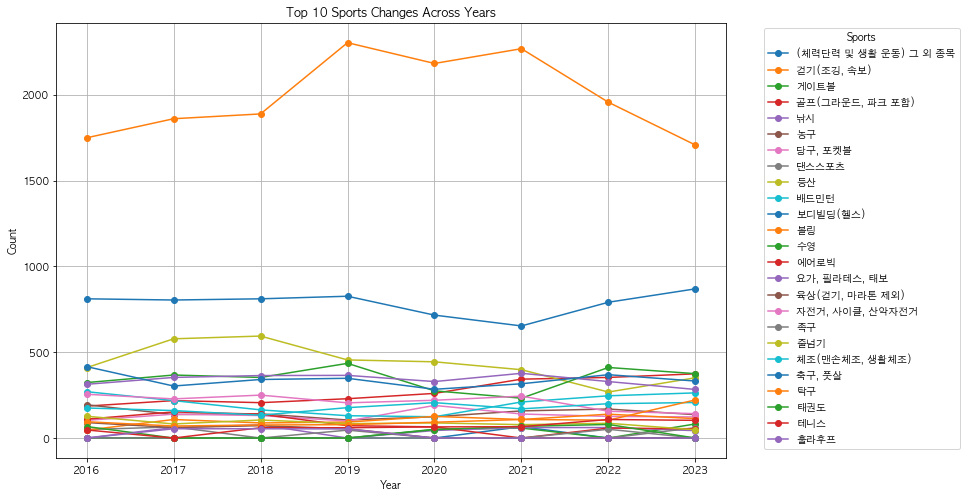

In [ ]:
import pandas as pd

# Step 1: Group by 'data_year' and 'sport1_kor' and count occurrences
sport_counts = df.groupby(['data_year', 'sport1_kor']).size().reset_index(name='count')

# Step 2: Find top 10 sports for each year
top_sports_by_year = (
    sport_counts.groupby('data_year', group_keys=False)
    .apply(lambda x: x.nlargest(20, 'count'))
)

# Step 3: Pivot table for visualization (rows: sports, columns: years, values: counts)
pivot_table = top_sports_by_year.pivot(index='sport1_kor', columns='data_year', values='count').fillna(0)

# Display the pivot table for analysis
print(pivot_table)

# Step 4: Visualize changes over years (e.g., heatmap or line chart)
import matplotlib.pyplot as plt

# Line chart for changes
pivot_table.T.plot(figsize=(12, 8), marker='o')
plt.title('Top 10 Sports Changes Across Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Sports', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
df[df['data_year'] == 2016]['area1']

63000    11
63001    11
63002    11
63003    11
63004    11
         ..
72007    39
72008    39
72009    39
72010    39
72011    39
Name: area1, Length: 9012, dtype: object

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
0,2256,서울특별시,1,17,3,103,농구,2023
1,2214,서울특별시,1,17,1,NaN,NaN,2023
2,2265,서울특별시,1,16,1,NaN,NaN,2023
3,62,서울특별시,1,17,1,NaN,NaN,2023
4,2071,서울특별시,1,18,1,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
72007,9916,39,1,4,2,402.0,"걷기(조깅, 속보)",2016
72008,9917,39,1,7,1,NaN,NaN,2016
72009,9918,39,2,4,1,NaN,NaN,2016
72010,9919,39,2,5,1,NaN,NaN,2016


In [ ]:
df[(df['data_year']==2016) | (df['data_year']==2018)]['area1'].unique()

array(['11', '21', '22', '23', '24', '25', '26', '29', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', 31, 23, 32, 11, 38, 26, 37, 22,
       29, 34, 33, 21, 25, 24, 35, 36, 39], dtype=object)

In [ ]:
df[df['data_year'] == 2017]['area1'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17'], dtype=object)

In [ ]:
area_1618 = {
    11: "서울", 21: "부산", 22: "대구", 23: "인천",
    24: "광주", 25: "대전", 26: "울산", 29: "세종",
    31: "경기", 32: "강원", 33: "충북", 34: "충남",
    35: "전북", 36: "전남", 37: "경북", 38: "경남", 39: "제주"
}

area_17 = {
    1: "서울", 2: "부산", 3: "대구", 4: "인천",
    5: "광주", 6: "대전", 7: "울산", 8: "세종",
    9: "경기", 10: "강원", 11: "충북", 12: "충남",
    13: "전북", 14: "전남", 15: "경북", 16: "경남", 17: "제주"
}

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1']

45000    11
45001    11
45002    11
45003    11
45004    11
         ..
72007    39
72008    39
72009    39
72010    39
72011    39
Name: area1, Length: 18012, dtype: object

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').isna().sum()

0

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').map(area_1618).isna().sum()

0

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1'] = pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').map(area_1618)

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1']

45000    서울
45001    서울
45002    서울
45003    서울
45004    서울
         ..
72007    제주
72008    제주
72009    제주
72010    제주
72011    제주
Name: area1, Length: 18012, dtype: object

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1']

54000     1
54001     1
54002     1
54003     1
54004     1
         ..
62995    17
62996    17
62997    17
62998    17
62999    17
Name: area1, Length: 9000, dtype: object

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2017]), 'area1'], errors='coerce').astype('Int64').map(area_17)

54000    서울
54001    서울
54002    서울
54003    서울
54004    서울
         ..
62995    제주
62996    제주
62997    제주
62998    제주
62999    제주
Name: area1, Length: 9000, dtype: object

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1'] = pd.to_numeric(df.loc[df['data_year'].isin([2017]), 'area1'], errors='coerce').astype('Int64').map(area_17)

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1']

54000    서울
54001    서울
54002    서울
54003    서울
54004    서울
         ..
62995    제주
62996    제주
62997    제주
62998    제주
62999    제주
Name: area1, Length: 9000, dtype: object

In [ ]:
df['area1'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도', '서울', '부산', '울산', '경남', '인천', '전북', '경기', '대구',
       '경북', '광주', '전남', '대전', '세종', '충북', '충남', '강원', '제주', '수원', '경기안양',
       '경기용인', '경기 수원', '경기 안산', '부산시', '울산시', '경상남', '창원', '경남 창원',
       '경상남동', '창원시', '경상북', '대전시', '세종시', '충북청주', '충청북', '청주', '충북 청주',
       '전주', '제주도', '포항', '포항시', '경북 포항', '01. 서울특별시', '09. 경기도',
       '17. 제주특별자치도', '02. 부산광역시', '03. 대구광역시', '04. 인천광역시', '05. 광주광역시',
       '06. 대전광역시', '07. 울산광역시', '08. 세종특별자치시', '10. 강원도', '11. 충청북도',
       '12. 충청남도', '13. 전라북도', '14. 전라남도', '15. 경상북도', '16. 경상남도'],
      dtype=object)

In [ ]:
df[df['area1'] == '경기 수원'] #1 item

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
28045,1337,경기 수원,2,72,1,NaN,NaN,2020
28046,1338,경기 수원,2,30,7,408.0,"요가, 필라테스, 태보",2020
28047,1339,경기 수원,2,61,4,402.0,"걷기(조깅, 속보)",2020
28048,1340,경기 수원,2,48,5,408.0,"요가, 필라테스, 태보",2020
28051,1343,경기 수원,1,62,5,404.0,보디빌딩(헬스),2020
28052,1344,경기 수원,1,54,1,NaN,NaN,2020
28053,1345,경기 수원,1,45,3,410.0,"자전거, 사이클, 산악자전거",2020


In [ ]:
df[df['data_year'] == 2020]['area1'].unique()

array(['서울', '인천', '경기', '수원', '경기안양', '경기용인', '경기 수원', '경기 안산', '경기도',
       '부산', '부산시', '울산시', '울산', '경남', '경상남', '창원', '경남 창원', '경상남도',
       '경상남동', '창원시', '대구', '경북', '경상북도', '경상북', '대전', '대전시', '세종', '세종시',
       '충북', '충북청주', '충청북', '청주', '충북 청주', '충남', '광주', '전남', '전북', '전라북도',
       '전라남도', '전주', '제주', '제주도', '강원', '포항', '포항시', '경북 포항'],
      dtype=object)

In [ ]:
df[df['area1'] == '수원']

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
27936,1228,수원,1,40,3,106.0,"축구, 풋살",2020
28828,2144,수원,2,25,1,NaN,NaN,2020
28829,2145,수원,2,41,1,NaN,NaN,2020
28830,2146,수원,1,26,3,106.0,"축구, 풋살",2020
28831,2147,수원,1,41,1,NaN,NaN,2020
28832,2148,수원,2,37,6,404.0,보디빌딩(헬스),2020
28834,2150,수원,2,70,1,NaN,NaN,2020
28835,2151,수원,1,42,6,404.0,보디빌딩(헬스),2020
28836,2152,수원,1,25,7,404.0,보디빌딩(헬스),2020
28837,2153,수원,2,18,3,412.0,"체조(맨손체조, 생활체조)",2020


In [ ]:
region_mapping = {
    # 서울
    "서울특별시": "서울",
    "서울": "서울",
    "01. 서울특별시": "서울",

    # 부산
    "부산광역시": "부산",
    "부산": "부산",
    "부산시": "부산",
    "02. 부산광역시": "부산",

    # 대구
    "대구광역시": "대구",
    "대구": "대구",
    "03. 대구광역시": "대구",

    # 인천
    "인천광역시": "인천",
    "인천": "인천",
    "04. 인천광역시": "인천",

    # 광주
    "광주광역시": "광주",
    "광주": "광주",
    "05. 광주광역시": "광주",

    # 대전
    "대전광역시": "대전",
    "대전": "대전",
    "대전시": "대전",
    "06. 대전광역시": "대전",

    # 울산
    "울산광역시": "울산",
    "울산": "울산",
    "울산시": "울산",
    "07. 울산광역시": "울산",

    # 세종
    "세종특별자치시": "세종",
    "세종": "세종",
    "세종시": "세종",
    "08. 세종특별자치시": "세종",

    # 경기도
    "경기도": "경기",
    "경기": "경기",
    "경기안양": "경기", #2020 only
    "경기용인": "경기", #2020 only
    "경기 수원": "경기", #1, 2020 only
    "경기 안산": "경기", #2020 only
    "수원" : "경기", # 2020 only
    "09. 경기도": "경기",

    # 강원도
    "강원도": "강원",
    "강원": "강원",
    "10. 강원도": "강원",

    # 충청북도
    "충청북도": "충북",
    "충북": "충북",
    "충북청주": "충북",
    "충청북": "충북",
    "청주": "충북", #2020 only
    "충북 청주": "충북",
    "11. 충청북도": "충북",

    # 충청남도
    "충청남도": "충남",
    "충남": "충남",
    "12. 충청남도": "충남",

    # 전라북도
    "전라북도": "전북",
    "전북": "전북",
    "전주": "전북",
    "13. 전라북도": "전북",

    # 전라남도
    "전라남도": "전남",
    "전남": "전남",
    "14. 전라남도": "전남",

    # 경상북도
    "경상북도": "경북",
    "경북": "경북",
    "경상북": "경북",
    "포항": "경북", #2020 only
    "포항시": "경북", #2020 only
    "경북 포항": "경북", #2020 only
    "15. 경상북도": "경북",

    # 경상남도
    "경상남도": "경남",
    "경남": "경남",
    "경상남": "경남",
    "경상남동": "경남",
    "창원": "경남", #2020 only
    "경남 창원": "경남", #2020 only
    "창원시": "경남", #2020 only
    "16. 경상남도": "경남",

    # 제주
    "제주특별자치도": "제주",
    "제주": "제주",
    "제주도": "제주",
    "17. 제주특별자치도": "제주",
}

In [ ]:
df['area1'].map(region_mapping).isna().sum()

0

In [ ]:
df['area1'] = df['area1'].map(region_mapping)

In [ ]:
len(df['area1'].unique())

17

In [ ]:
(df['sport1'].isna() == df['sport1'].astype('Int64').isna()).sum() ==len(df)

True

In [ ]:
df['sport1'] = df['sport1'].astype('Int64')

In [ ]:
df[df['sport1'].isna() != df['sport1_kor'].isna()]

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year
1867,9294,대구,1,76,4,410,NaN,2023
2124,9290,대구,2,77,4,410,NaN,2023
4872,2549,경기,2,28,7,204,NaN,2023
6958,5546,전북,2,27,5,204,NaN,2023
8853,20032,제주,1,81,9,404,NaN,2023


In [ ]:
# df.to_csv('output1623_cleaned.csv', index=False, encoding='utf-8-sig')
df = pd.read_csv('output1623_cleaned.csv', encoding='utf-8-sig')

In [ ]:
sports_mapping_16 = {
    101: "게이트볼",
    102: "골프(그라운드, 파크 포함)",
    103: "농구",
    104: "배구",
    105: "럭비, 미식축구",
    106: "축구, 풋살",
    107: "족구",
    108: "핸드볼",
    109: "야구",
    110: "소프트볼",
    111: "수구",
    112: "당구, 포켓볼",
    113: "볼링",
    114: "인라인하키, 필드하키",
    115: "라켓볼",
    116: "테니스",
    117: "배드민턴",
    118: "스쿼시",
    119: "정구",
    120: "탁구",
    121: "(구기 및 라켓류) 그 외 종목",
    201: "유도",
    202: "검도",
    203: "태권도",
    204: "무도(유도, 검도, 태권도 제외)",
    205: "격투기(킥복싱, 이종격투기)",
    206: "레슬링",
    207: "권투",
    208: "펜싱",
    209: "(무도/격투기) 그 외 종목",
    301: "석궁, 양궁, 국궁",
    302: "씨름",
    303: "(민속 스포츠) 그 외 종목",
    401: "마라톤",
    402: "걷기(조깅, 속보)",
    403: "육상(걷기, 마라톤 제외)",
    404: "보디빌딩(헬스)",
    405: "수영",
    406: "아쿠아로빅, 수중발레",
    407: "에어로빅",
    408: "요가, 필라테스, 태보",
    409: "댄스스포츠",
    410: "자전거, 사이클, 산악자전거",
    411: "줄넘기",
    412: "체조(맨손체조, 생활체조)",
    413: "훌라후프",
    414: "(체력단력 및 생활 운동) 그 외 종목",
    501: "빙상(아이스하키, 스케이팅 포함)",
    502: "사격",
    503: "서바이벌",
    504: "스노우보드, 스키",
    505: "승마",
    506: "암벽등반",
    507: "인라인스케이트",
    508: "트라이애스론(철인3종)",
    509: "항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)",
    510: "래프팅",
    511: "수상스키, 웨이크보드, 윈드서핑",
    512: "스킨스쿠버",
    513: "카누",
    514: "요트",
    515: "(레저 스포츠) 그 외 종목",
    601: "등산",
    602: "낚시",
    603: "(기타 스포츠) 그 외 종목",
}

In [ ]:
df['sport1'].map(sports_mapping_16).isna().sum() == df['sport1'].isna().sum()

True

In [ ]:
df['sport1_kor2'] = df['sport1'].map(sports_mapping_16)

In [ ]:
df[df['sport1_kor'] != df['sport1_kor2']][['sport1_kor','sport1_kor2']].dropna()

,sport1_kor,sport1_kor2
17645,"걷기(조깅, 속보)","요가, 필라테스, 태보"
17646,"요가, 필라테스, 태보","걷기(조깅, 속보)"
45821,트라이 애스론,트라이애스론(철인3종)


In [ ]:
# df.loc[[17645,17646]]

KeyError: "None of [Int64Index([17645, 17646], dtype='int64')] are in the [index]"

In [ ]:
# df = df.drop(index=[17645, 17646])
# df = df.reset_index(drop=True)

In [ ]:
df

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year,sport1_kor2
0,2256,서울,1,17,3,103,농구,2023,농구
1,2214,서울,1,17,1,<NA>,NaN,2023,NaN
2,2265,서울,1,16,1,<NA>,NaN,2023,NaN
3,62,서울,1,17,1,<NA>,NaN,2023,NaN
4,2071,서울,1,18,1,<NA>,NaN,2023,NaN
...,...,...,...,...,...,...,...,...,...
72007,9916,제주,1,4,2,402,"걷기(조깅, 속보)",2016,"걷기(조깅, 속보)"
72008,9917,제주,1,7,1,<NA>,NaN,2016,NaN
72009,9918,제주,2,4,1,<NA>,NaN,2016,NaN
72010,9919,제주,2,5,1,<NA>,NaN,2016,NaN


In [ ]:
df[df['sport1_kor'].isna() & df['sport1_kor2'].notna()] # 2023: id 9294, 9290, 2549, 5546, 20032 code Yes, but kor No. => Used code for generating korean sports.

,id,area1,gender,age,sport_part,sport1,sport1_kor,data_year,sport1_kor2
1867,9294,대구,1,76,4,410,NaN,2023,"자전거, 사이클, 산악자전거"
2124,9290,대구,2,77,4,410,NaN,2023,"자전거, 사이클, 산악자전거"
4872,2549,경기,2,28,7,204,NaN,2023,"무도(유도, 검도, 태권도 제외)"
6958,5546,전북,2,27,5,204,NaN,2023,"무도(유도, 검도, 태권도 제외)"
8853,20032,제주,1,81,9,404,NaN,2023,보디빌딩(헬스)


In [ ]:
df['sport1_kor2'].isna().sum() == df['sport1'].isna().sum()

True

In [ ]:
df = df[['data_year', 'id', 'gender', 'age', 'area1', 'sport_part', 'sport1', 'sport1_kor2']]

In [ ]:
df.columns = ['dyear', 'id', 'gender', 'age', 'area', 'sport_part', 'csport', 'ksport']

In [ ]:
df

,dyear,id,gender,age,area,sport_part,csport,ksport
0,2023,2256,1,17,서울,3,103,농구
1,2023,2214,1,17,서울,1,<NA>,NaN
2,2023,2265,1,16,서울,1,<NA>,NaN
3,2023,62,1,17,서울,1,<NA>,NaN
4,2023,2071,1,18,서울,1,<NA>,NaN
...,...,...,...,...,...,...,...,...
72007,2016,9916,1,4,제주,2,402,"걷기(조깅, 속보)"
72008,2016,9917,1,7,제주,1,<NA>,NaN
72009,2016,9918,2,4,제주,1,<NA>,NaN
72010,2016,9919,2,5,제주,1,<NA>,NaN


# EDA

In [ ]:
# df.to_csv('output1623_cl.csv', index=False, encoding='utf-8-sig')
df = pd.read_csv('output1623_cl.csv',encoding="utf-8-sig")

In [ ]:
df

,dyear,id,gender,age,area,sport_part,csport,ksport
0,2023,2256,1,17,서울,3,103.0,농구
1,2023,2214,1,17,서울,1,NaN,NaN
2,2023,2265,1,16,서울,1,NaN,NaN
3,2023,62,1,17,서울,1,NaN,NaN
4,2023,2071,1,18,서울,1,NaN,NaN
...,...,...,...,...,...,...,...,...
72007,2016,9916,1,4,제주,2,402.0,"걷기(조깅, 속보)"
72008,2016,9917,1,7,제주,1,NaN,NaN
72009,2016,9918,2,4,제주,1,NaN,NaN
72010,2016,9919,2,5,제주,1,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72012 entries, 0 to 72011
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dyear       72012 non-null  int64  
 1   id          72012 non-null  int64  
 2   gender      72012 non-null  int64  
 3   age         72012 non-null  int64  
 4   area        72012 non-null  object 
 5   sport_part  72012 non-null  int64  
 6   csport      51034 non-null  float64
 7   ksport      51034 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.4+ MB


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
               dyear            id        gender           age   area  \
count   72012.000000  7.201200e+04  72012.000000  72012.000000  72012   
unique           NaN           NaN           NaN           NaN     17   
top              NaN           NaN           NaN           NaN     경기   
freq             NaN           NaN           NaN           NaN  10013   
mean     2019.499417  1.107897e+04      1.501944     39.324515    NaN   
std         2.291558  1.238101e+05      0.500000     22.237317    NaN   
min      2016.000000  1.000000e+00      1.000000      0.000000    NaN   
25%      2017.000000  2.648750e+03      1.000000     21.000000    NaN   
50%      2019.000000  5.391000e+03      2.000000     41.000000    NaN   
75%      2021.000000  8.128000e+03      2.000000     57.000000    NaN   
max      2023.000000  9.913515e+06      2.000000     90.000000    NaN   

          sport_part        csport      ksport  
count   72012.000000  51034.000000       51034  


In [ ]:
df.isna().sum()

dyear             0
id                0
gender            0
age               0
area              0
sport_part        0
csport        20978
ksport        20978
dtype: int64

In [ ]:
# Create 'csport_part' column based on 'sport_part'
if 'sport_part' in df.columns:
    df['csport_part'] = df['sport_part'].apply(lambda x: 0 if x == 1 else 1)
else:
    print("Column 'sport_part' does not exist in the dataset.")

In [ ]:
# 청년층(만15세~39세), 중·장년층(만40세~64세), 노년층(만65세 이상)
if 'age' in df.columns:
    df['cage'] = df['age'].apply(lambda x: 'young' if x <= 39 else ('middle' if 40 <= x <= 64 else ('old' if 65 <= x else None)))

In [ ]:
# Replace gender labels: 1 -> Male, 2 -> Female
df['gender'] = df['gender'].replace({1: 'Male', 2: 'Female'})

In [ ]:
df['cage'].isna().sum()

0

In [ ]:
print(df['gender'].value_counts())
print(df['gender'].value_counts(normalize=True)*100)
print(df['cage'].value_counts())
print(df['cage'].value_counts(normalize=True)*100)
print(df['csport_part'].value_counts())
print(df['csport_part'].value_counts(normalize=True)*100)

Female    36146
Male      35866
Name: gender, dtype: int64
Female    50.194412
Male      49.805588
Name: gender, dtype: float64
young     35030
middle    26438
old       10544
Name: cage, dtype: int64
young     48.644670
middle    36.713326
old       14.642004
Name: cage, dtype: float64
1    51034
0    20978
Name: csport_part, dtype: int64
1    70.868744
0    29.131256
Name: csport_part, dtype: float64


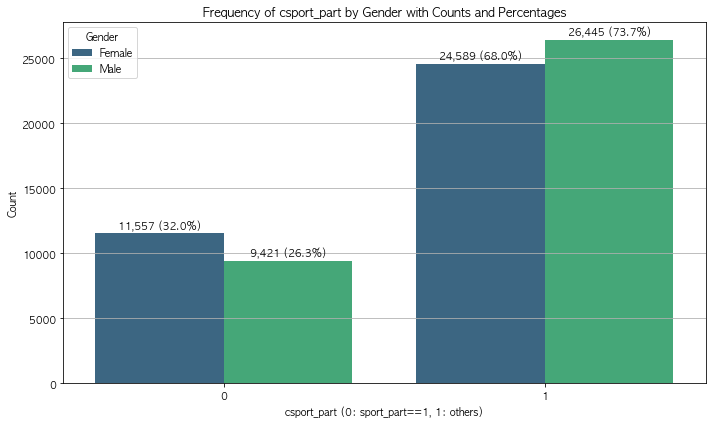

Frequency and Percentage of csport_part by Gender:

   csport_part  gender  count  percentage
0            0  Female  11557   31.973109
1            1  Female  24589   68.026891
2            0    Male   9421   26.267217
3            1    Male  26445   73.732783


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if gender column exists
if 'gender' not in df.columns:
    print("Please specify the correct column name for 'gender'.")
else:
    # Group by 'csport_part' and 'gender', count occurrences
    csport_gender_counts = df.groupby(['csport_part', 'gender'], as_index=False).size()
    csport_gender_counts.rename(columns={'size': 'count'}, inplace=True)

    # Calculate total count per gender
    gender_totals = csport_gender_counts.groupby('gender')['count'].sum()

    # Calculate percentage and explicitly assign
    csport_gender_counts['percentage'] = csport_gender_counts.apply(
        lambda row: (row['count'] / gender_totals[row['gender']]) * 100, axis=1
    )

    # Explicitly sort by gender and csport_part to maintain order
    csport_gender_counts = csport_gender_counts.sort_values(by=['gender', 'csport_part']).reset_index(drop=True)

    # Plot the barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='csport_part',
        y='count',
        hue='gender',
        data=csport_gender_counts,
        palette='viridis'
    )

    # Add count and percentage data labels on top of the bars
    for p, count, percentage in zip(ax.patches, csport_gender_counts['count'], csport_gender_counts['percentage']):
        ax.annotate(
            f'{count:,} ({percentage:.1f}%)',  # Display count and percentage
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='center',
            xytext=(0, 8),
            textcoords='offset points',
            fontsize=10, color='black'
        )

    # Customize plot
    plt.title('Frequency of csport_part by Gender with Counts and Percentages')
    plt.xlabel('csport_part (0: sport_part==1, 1: others)')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Print the frequency counts with percentages
    print("Frequency and Percentage of csport_part by Gender:\n")
    print(csport_gender_counts)


## RQ: Sports participation & Sports by age.

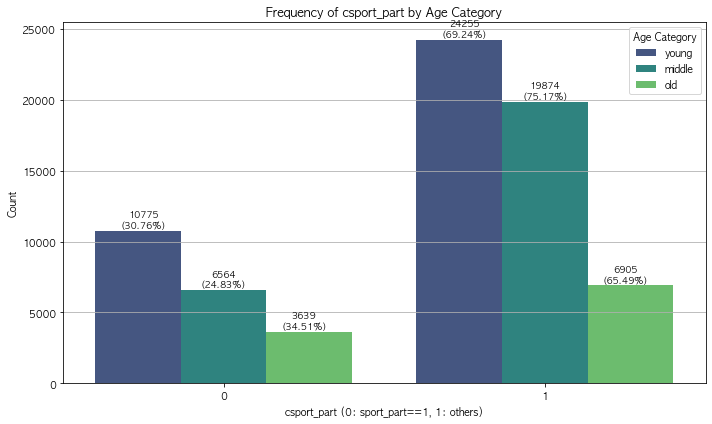

Frequency of csport_part by Age Category with Percentages:

   csport_part    cage  count  percentage
2            0   young  10775       30.76
0            0  middle   6564       24.83
1            0     old   3639       34.51
5            1   young  24255       69.24
3            1  middle  19874       75.17
4            1     old   6905       65.49


In [ ]:
# Group by 'csport_part' and 'cage', count occurrences
csport_cage_counts = df.groupby(['csport_part', 'cage']).size().reset_index(name='count')

# Ensure 'cage' order: young -> middle -> old
cage_order = ['young', 'middle', 'old']
csport_cage_counts['cage'] = pd.Categorical(csport_cage_counts['cage'], categories=cage_order, ordered=True)

# Calculate percentage based on each 'cage' group
cage_totals = csport_cage_counts.groupby('cage')['count'].transform('sum')
csport_cage_counts['percentage'] = (csport_cage_counts['count'] / cage_totals * 100).round(2)

# Plot frequency of 'csport_part' separated by age category (cage) with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='csport_part', y='count', hue='cage', data=csport_cage_counts, palette='viridis')
plt.title('Frequency of csport_part by Age Category')
plt.xlabel('csport_part (0: sport_part==1, 1: others)')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.grid(axis='y')

# Add percentage labels directly from the data
for i, row in csport_cage_counts.iterrows():
    x_position = row['csport_part'] - 0.25 + 0.25 * cage_order.index(row['cage'])
    ax.annotate(f"{row['count']}\n({row['percentage']}%)",
                (x_position, row['count'] + 50), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print the frequency counts by age category with percentages
print("Frequency of csport_part by Age Category with Percentages:\n")
print(csport_cage_counts.sort_values(by=['csport_part', 'cage']))


Rankings of Areas for Each Year:

Year: 2016
   area  counts  rank
0    경기    1591   1.0
1    서울    1496   2.0
2    경남     591   3.0
3    경북     560   4.0
4    부산     510   5.0
5    충남     480   6.0
6    대구     460   7.0
7    전남     440   8.0
8    인천     431   9.0
9    전북     430  10.0
10   충북     420  11.0
11   강원     413  12.0
12   울산     310  13.0
13   대전     290  14.0
14   광주     280  15.0
15   제주     210  16.0
16   세종     100  17.0
----------------------------------------
Year: 2017
   area  counts  rank
0    경기    1140   1.0
1    서울    1060   2.0
2    부산     640   3.0
3    경남     610   4.0
4    경북     570   5.0
5    인천     560   6.0
6    대구     540   7.0
7    충남     500   8.0
8    전남     460   9.0
9    전북     460   9.0
10   강원     430  10.0
11   충북     430  10.0
12   대전     420  11.0
13   광주     400  12.0
14   울산     360  13.0
15   제주     270  14.0
16   세종     150  15.0
----------------------------------------
Year: 2018
   area  counts  rank
0    경기    1150   1.0
1    서울    1060

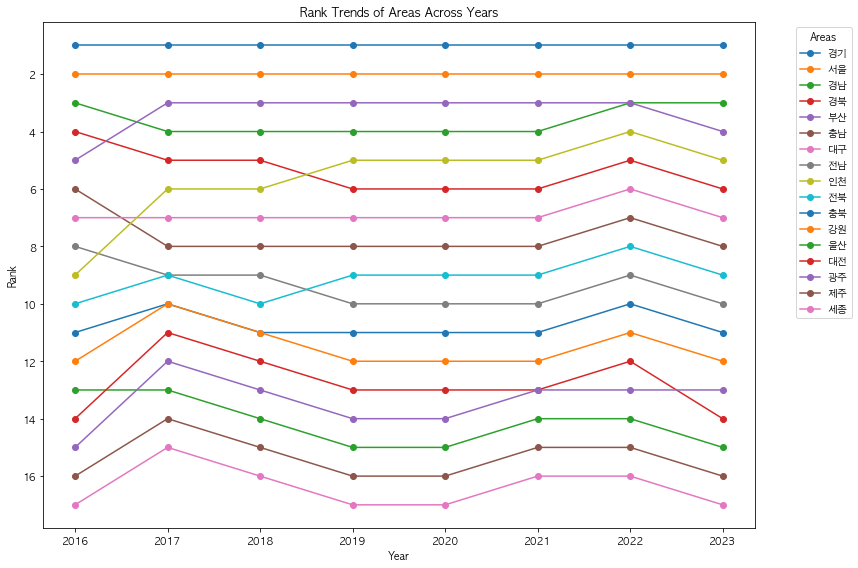

In [ ]:
# Assuming 'dyear' and 'area' columns exist, replace with actual column names if different
if 'dyear' not in df.columns or 'area' not in df.columns:
    print("Please specify the correct column names for 'dyear' and 'area'.")
else:
    # Group data by dyear and area, and count occurrences
    area_counts = df.groupby(['dyear', 'area']).size().reset_index(name='counts')

    # Rank areas within each year based on counts
    area_counts['rank'] = area_counts.groupby('dyear')['counts'].rank(ascending=False, method='dense')

    # Sort data for better readability
    area_counts_sorted = area_counts.sort_values(by=['dyear', 'rank'])

    # Show rankings for each year
    print("Rankings of Areas for Each Year:\n")
    for year, group in area_counts_sorted.groupby('dyear'):
        print(f"Year: {year}")
        print(group[['area', 'counts', 'rank']].reset_index(drop=True))
        print("-" * 40)

    # Visualization: Line plot showing the rank trends of areas over years
    plt.figure(figsize=(12, 8))
    for area in area_counts_sorted['area'].unique():
        area_trend = area_counts_sorted[area_counts_sorted['area'] == area]
        plt.plot(area_trend['dyear'], area_trend['rank'], marker='o', linestyle='-', label=area)
    plt.gca().invert_yaxis()  # Invert Y-axis to show rank 1 at the top
    plt.title("Rank Trends of Areas Across Years")
    plt.xlabel("Year")
    plt.ylabel("Rank")
    plt.legend(title="Areas", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Top 20 Sports by Frequency:
             ksport  count
0        걷기(조깅, 속보)  15913
1          보디빌딩(헬스)   6282
2                등산   3498
3                수영   2771
4      요가, 필라테스, 태보   2713
5            축구, 풋살   2709
6   골프(그라운드, 파크 포함)   2169
7   자전거, 사이클, 산악자전거   1702
8              배드민턴   1625
9    체조(맨손체조, 생활체조)   1428
10               농구   1164
11          당구, 포켓볼   1051
12               탁구    845
13               볼링    821
14             에어로빅    707
15              줄넘기    698
16              테니스    553
17              태권도    438
18               낚시    433
19   육상(걷기, 마라톤 제외)    402


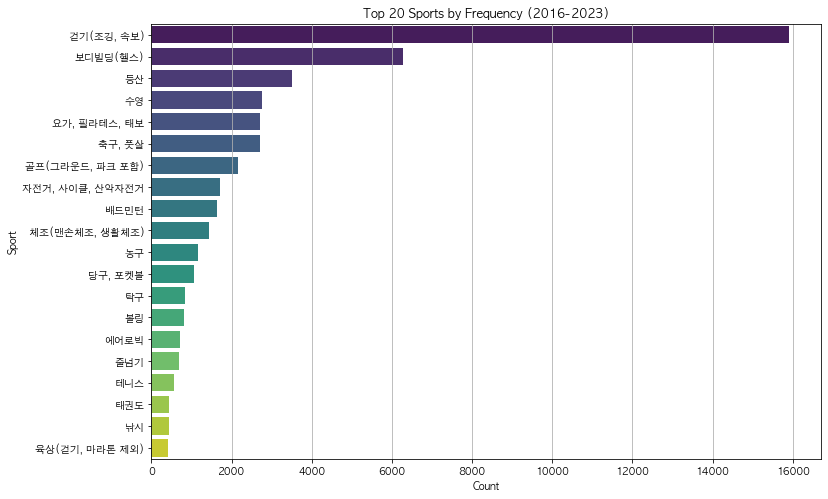

In [ ]:
# Frequency ranking of sports from 2016 to 2023
if 'ksport' in df.columns and 'dyear' in df.columns:
    # Group by sport and count occurrences
    sport_counts = df['ksport'].value_counts().reset_index()
    sport_counts.columns = ['ksport', 'count']

    # Display top 20 sports
    print("Top 20 Sports by Frequency:")
    print(sport_counts.head(20))

    # Plot the top 20 sports
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='ksport', data=sport_counts.head(20), palette='viridis')
    plt.title('Top 20 Sports by Frequency (2016-2023)')
    plt.xlabel('Count')
    plt.ylabel('Sport')
    plt.grid(axis='x')
    plt.show()

## RQ: Sports that male and female can do together?

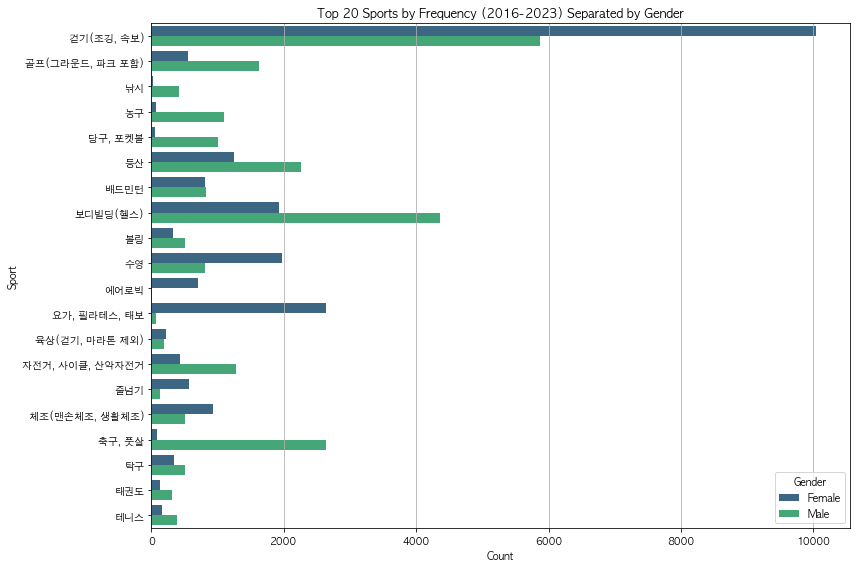

Top 20 Sports by Frequency Separated by Gender:

              ksport  gender  count
11        걷기(조깅, 속보)  Female  10044
12        걷기(조깅, 속보)    Male   5868
49          보디빌딩(헬스)    Male   4352
85      요가, 필라테스, 태보  Female   2641
108           축구, 풋살    Male   2631
32                등산    Male   2255
66                수영  Female   1965
48          보디빌딩(헬스)  Female   1930
20   골프(그라운드, 파크 포함)    Male   1623
98   자전거, 사이클, 산악자전거    Male   1278
31                등산  Female   1243
26                농구    Male   1093
28           당구, 포켓볼    Male   1002
105   체조(맨손체조, 생활체조)  Female    927
47              배드민턴    Male    817
46              배드민턴  Female    808
67                수영    Male    806
83              에어로빅  Female    696
103              줄넘기  Female    569
19   골프(그라운드, 파크 포함)  Female    546
111               탁구    Male    509
51                볼링    Male    502
106   체조(맨손체조, 생활체조)    Male    501
97   자전거, 사이클, 산악자전거  Female    424
24                낚시    Male    412
115            

In [ ]:
# Literature on male sports vs. female sports.

# Assuming 'dyear', 'ksport', and 'gender' columns exist
if 'ksport' not in df.columns or 'dyear' not in df.columns or 'gender' not in df.columns:
    print("Please specify the correct column names for 'dyear', 'ksport', and 'gender'.")
else:
    # Group by sport and gender, count occurrences
    sport_gender_counts = df.groupby(['ksport', 'gender']).size().reset_index(name='count')

    # Sort values by count and get the top 20 sports overall
    top_sports = sport_gender_counts.groupby('ksport')['count'].sum().nlargest(20).index
    top_sport_data = sport_gender_counts[sport_gender_counts['ksport'].isin(top_sports)]

    # Plot the top 20 sports separated by gender
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='ksport', hue='gender', data=top_sport_data, palette='viridis')
    plt.title('Top 20 Sports by Frequency (2016-2023) Separated by Gender')
    plt.xlabel('Count')
    plt.ylabel('Sport')
    plt.legend(title='Gender')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

    # Print the top 20 sports with gender counts
    print("Top 20 Sports by Frequency Separated by Gender:\n")
    print(top_sport_data.sort_values(by=['count'], ascending=False))


Top 20 Sports for Men:
걷기(조깅, 속보)         5868
보디빌딩(헬스)           4352
축구, 풋살             2631
등산                 2255
골프(그라운드, 파크 포함)    1623
자전거, 사이클, 산악자전거    1278
농구                 1093
당구, 포켓볼            1002
배드민턴                817
수영                  806
탁구                  509
볼링                  502
체조(맨손체조, 생활체조)      501
낚시                  412
테니스                 387
태권도                 304
족구                  283
야구                  279
게이트볼                263
육상(걷기, 마라톤 제외)      187
Name: ksport, dtype: int64

Top 20 Sports for Women:
걷기(조깅, 속보)               10045
요가, 필라테스, 태보              2642
수영                        1965
보디빌딩(헬스)                  1930
등산                        1243
체조(맨손체조, 생활체조)             927
배드민턴                       808
에어로빅                       696
줄넘기                        569
골프(그라운드, 파크 포함)            546
자전거, 사이클, 산악자전거            424
댄스스포츠                      352
탁구                         336
볼링                         319
훌라후프      

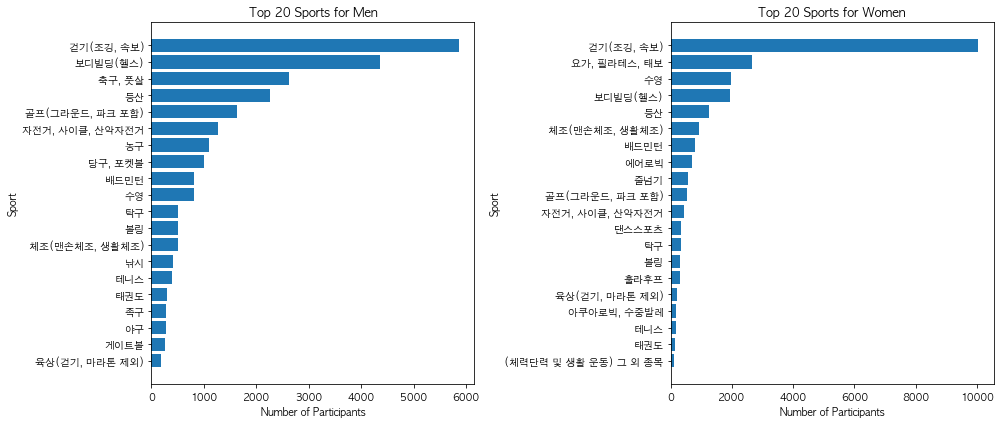

In [ ]:
import pandas as pd

# Assuming 'gender' and 'ksport' columns exist in your DataFrame
# Filter data for Male and Female
male_sports = df[df['gender'] == 'Male']['ksport'].value_counts().head(20)
female_sports = df[df['gender'] == 'Female']['ksport'].value_counts().head(20)

# Display results
print("Top 20 Sports for Men:")
print(male_sports)

print("\nTop 20 Sports for Women:")
print(female_sports)

# Plotting results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 20 sports for men
axes[0].barh(male_sports.index[::-1], male_sports.values[::-1])
axes[0].set_title("Top 20 Sports for Men")
axes[0].set_xlabel("Number of Participants")
axes[0].set_ylabel("Sport")

# Top 20 sports for women
axes[1].barh(female_sports.index[::-1], female_sports.values[::-1])
axes[1].set_title("Top 20 Sports for Women")
axes[1].set_xlabel("Number of Participants")
axes[1].set_ylabel("Sport")

plt.tight_layout()
plt.show()


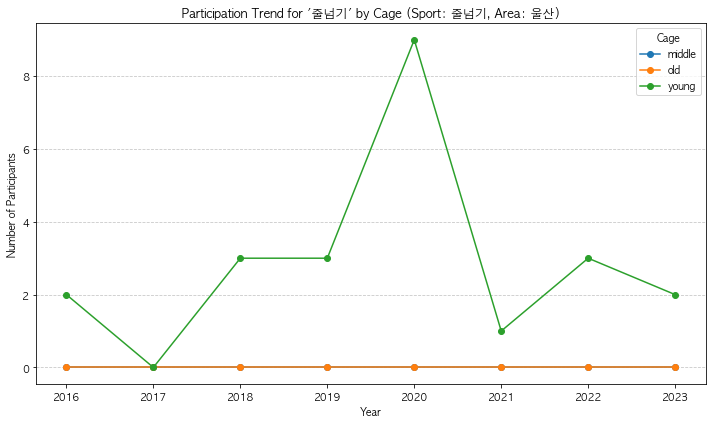

Trend Data for '줄넘기' by Cage (Sport: 줄넘기, Area: 울산):
cage   middle  old  young
dyear                    
2016        0    0      2
2017        0    0      0
2018        0    0      3
2019        0    0      3
2020        0    0      9
2021        0    0      1
2022        0    0      3
2023        0    0      2


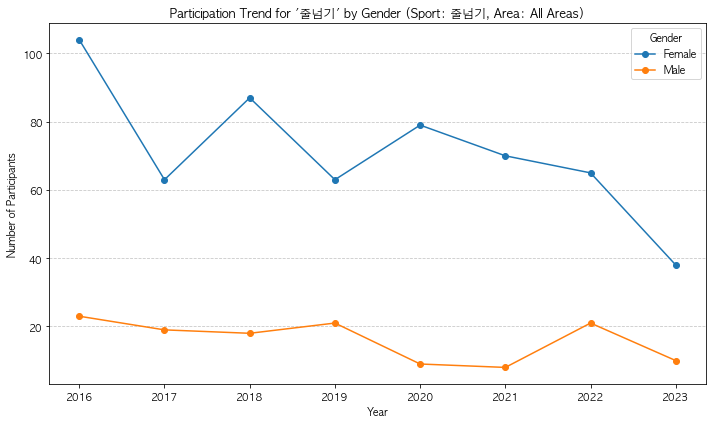

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: All Areas):
gender  Female  Male
dyear               
2016       104    23
2017        63    19
2018        87    18
2019        63    21
2020        79     9
2021        70     8
2022        65    21
2023        38    10
No data found for sport '골프'.
No data found for sport '골프'.


In [ ]:
def show_trend(df, filter_type, ksport, area=None):
    """
    Show trends across years (2016-2023) for unique values of 'gender' or 'cage',
    filtered by a specific sport (ksport) and optionally by area.

    Parameters:
    - df: DataFrame with 'gender', 'cage', 'ksport', 'area', and 'dyear' columns.
    - filter_type: 'gender' or 'cage' to display trends for unique values in that column.
    - ksport: Sport name (string) to filter the data (e.g., '줄넘기').
    - area: Area name (string, optional) to further filter the data (e.g., '울산').
    """
    # Check required columns exist
    required_columns = {'gender', 'cage', 'ksport', 'area', 'dyear'}
    if not required_columns.issubset(df.columns):
        print(f"Please ensure the following columns exist in the DataFrame: {required_columns}")
        return

    # Validate filter_type
    if filter_type not in ['gender', 'cage']:
        print("Invalid filter_type. Please use 'gender' or 'cage'.")
        return

    # Filter data for the specified sport
    df_filtered = df[df['ksport'].str.lower() == ksport.lower()]
    if df_filtered.empty:  # Case 1: ksport does not exist
        print(f"No data found for sport '{ksport}'.")
        return

    # Optional: Filter data for the specified area
    if area:
        df_filtered = df_filtered[df_filtered['area'] == area]
        if df_filtered.empty:  # Case 2: area does not exist
            print(f"No data found for sport '{ksport}' in area '{area}'.")
            return

    # Get all possible values for the filter type across the entire dataset
    all_filter_values = df[filter_type].dropna().unique()

    # Group by year and filter_type, count occurrences
    trend_data = df_filtered.groupby(['dyear', filter_type]).size().reset_index(name='count')

    # Ensure all year-filter combinations are included (including missing filter_type values)
    full_index = pd.MultiIndex.from_product(
        [range(2016, 2024), all_filter_values], names=['dyear', filter_type]
    )
    trend_data = trend_data.set_index(['dyear', filter_type]).reindex(full_index, fill_value=0).reset_index()

    # Pivot the data for plotting
    trend_pivot = trend_data.pivot(index='dyear', columns=filter_type, values='count').fillna(0)

    # Plot the line graph
    plt.figure(figsize=(10, 6))
    for col in trend_pivot.columns:
        plt.plot(trend_pivot.index, trend_pivot[col], marker='o', linestyle='-', label=col)

    # Customize the plot
    title_info = f"Sport: {ksport}, Area: {area if area else 'All Areas'}"
    plt.title(f"Participation Trend for '{ksport}' by {filter_type.capitalize()} ({title_info})")
    plt.xlabel('Year')
    plt.ylabel('Number of Participants')
    plt.legend(title=filter_type.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the trend data
    print(f"Trend Data for '{ksport}' by {filter_type.capitalize()} ({title_info}):")
    print(trend_pivot)

# Example usage:
# Show trend for '줄넘기' by cage in the area '울산'
show_trend(df, filter_type='cage', ksport='줄넘기', area='울산')

# Show trend for '줄넘기' by gender for all areas
show_trend(df, filter_type='gender', ksport='줄넘기')

# Show trend for '골프' by cage in '부산'
show_trend(df, filter_type='cage', ksport='골프', area='부산')

# Show trend for '골프' by cage for all areas
show_trend(df, filter_type='cage', ksport='골프')


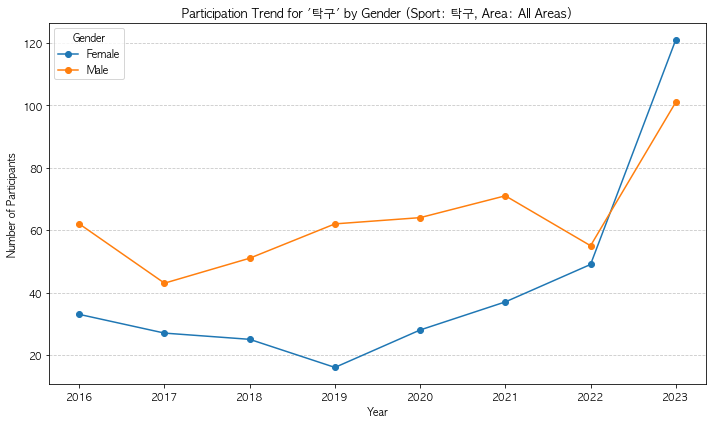

Trend Data for '탁구' by Gender (Sport: 탁구, Area: All Areas):
gender  Female  Male
dyear               
2016        33    62
2017        27    43
2018        25    51
2019        16    62
2020        28    64
2021        37    71
2022        49    55
2023       121   101


In [ ]:
show_trend(df,'gender','탁구')

## RQ: COVID 19 sports vs. not

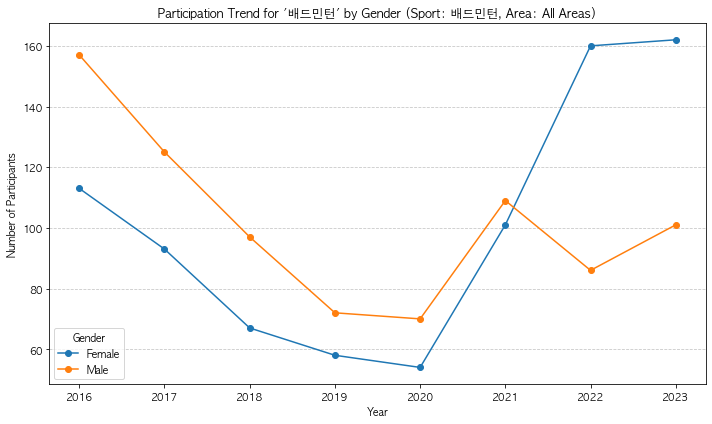

Trend Data for '배드민턴' by Gender (Sport: 배드민턴, Area: All Areas):
gender  Female  Male
dyear               
2016       113   157
2017        93   125
2018        67    97
2019        58    72
2020        54    70
2021       101   109
2022       160    86
2023       162   101


In [ ]:
show_trend(df,'gender', '배드민턴')

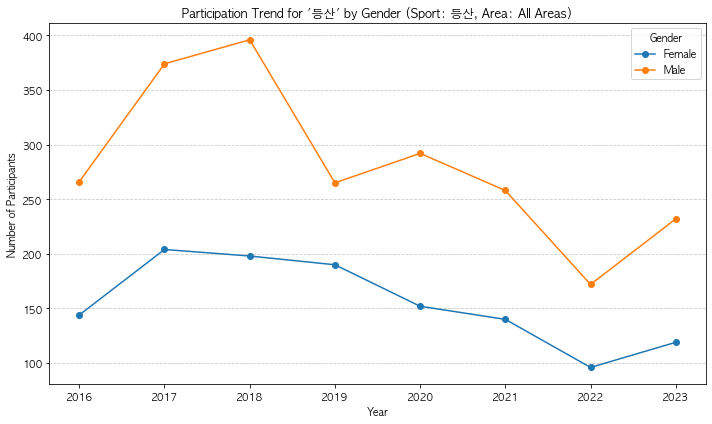

Trend Data for '등산' by Gender (Sport: 등산, Area: All Areas):
gender  Female  Male
dyear               
2016       144   266
2017       204   374
2018       198   396
2019       190   265
2020       152   292
2021       140   258
2022        96   172
2023       119   232


In [ ]:
show_trend(df,'gender', '등산')

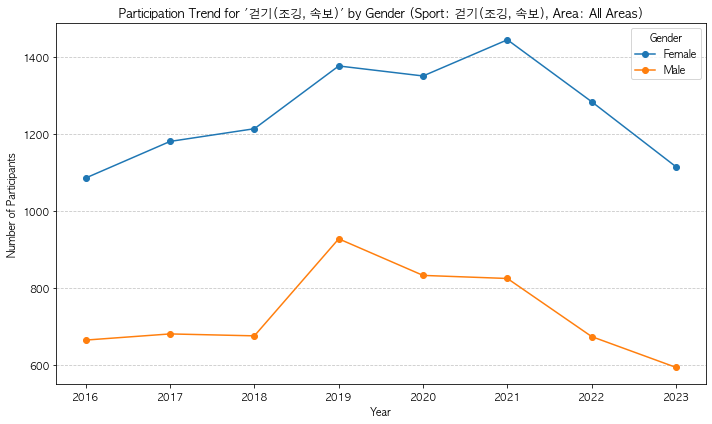

Trend Data for '걷기(조깅, 속보)' by Gender (Sport: 걷기(조깅, 속보), Area: All Areas):
gender  Female  Male
dyear               
2016      1085   664
2017      1180   680
2018      1213   675
2019      1376   927
2020      1350   832
2021      1444   824
2022      1283   673
2023      1114   593


In [ ]:
show_trend(df,'gender', '걷기(조깅, 속보)')

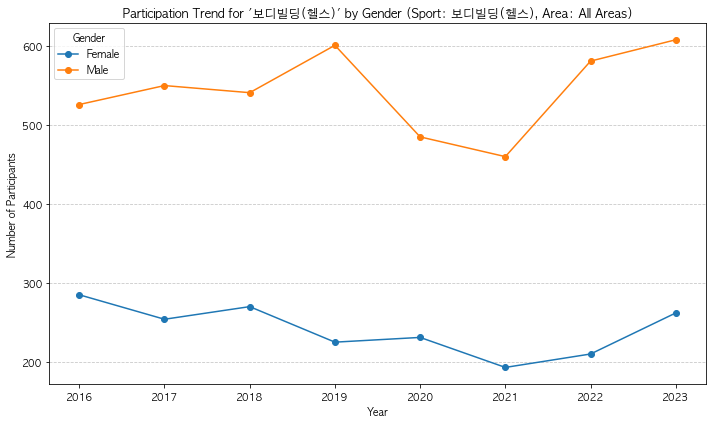

Trend Data for '보디빌딩(헬스)' by Gender (Sport: 보디빌딩(헬스), Area: All Areas):
gender  Female  Male
dyear               
2016       285   526
2017       254   550
2018       270   541
2019       225   601
2020       231   485
2021       193   460
2022       210   581
2023       262   608


In [ ]:
show_trend(df, 'gender', '보디빌딩(헬스)')

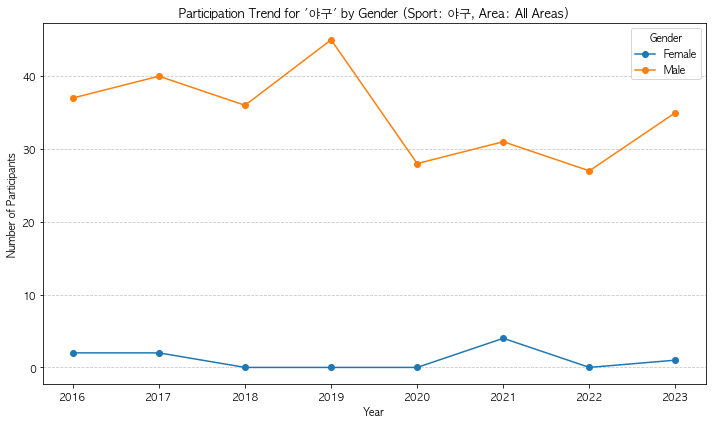

Trend Data for '야구' by Gender (Sport: 야구, Area: All Areas):
gender  Female  Male
dyear               
2016         2    37
2017         2    40
2018         0    36
2019         0    45
2020         0    28
2021         4    31
2022         0    27
2023         1    35


In [ ]:
show_trend(df, 'gender', '야구')

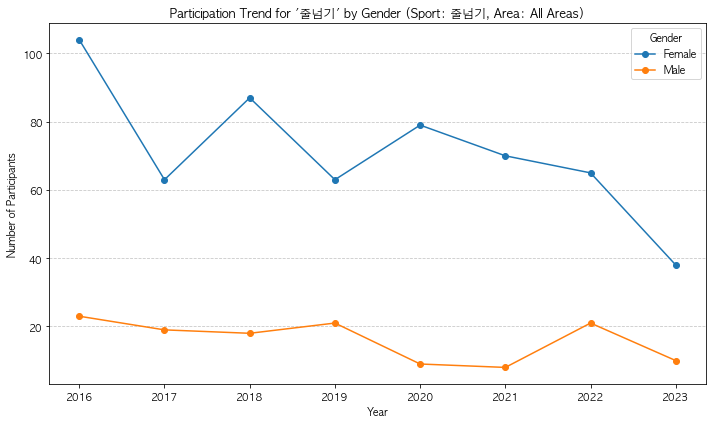

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: All Areas):
gender  Female  Male
dyear               
2016       104    23
2017        63    19
2018        87    18
2019        63    21
2020        79     9
2021        70     8
2022        65    21
2023        38    10


In [ ]:
show_trend(df, 'gender', '줄넘기')

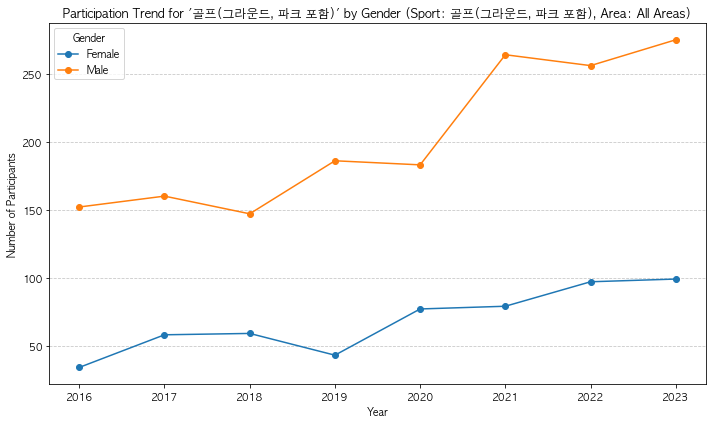

Trend Data for '골프(그라운드, 파크 포함)' by Gender (Sport: 골프(그라운드, 파크 포함), Area: All Areas):
gender  Female  Male
dyear               
2016        34   152
2017        58   160
2018        59   147
2019        43   186
2020        77   183
2021        79   264
2022        97   256
2023        99   275


In [ ]:
show_trend(df, 'gender', '골프(그라운드, 파크 포함)')

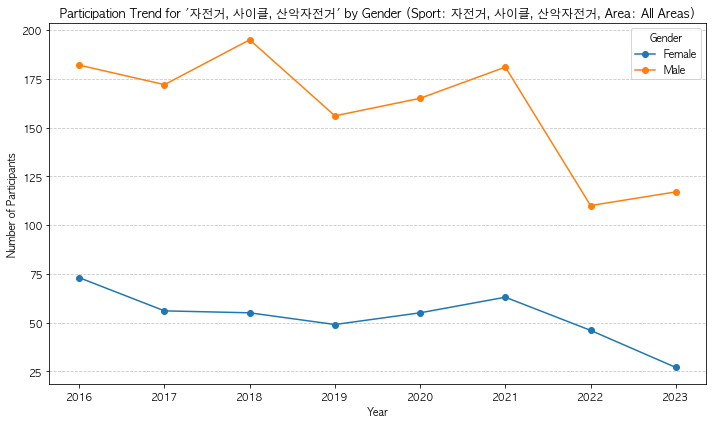

Trend Data for '자전거, 사이클, 산악자전거' by Gender (Sport: 자전거, 사이클, 산악자전거, Area: All Areas):
gender  Female  Male
dyear               
2016        73   182
2017        56   172
2018        55   195
2019        49   156
2020        55   165
2021        63   181
2022        46   110
2023        27   117


In [ ]:
show_trend(df, 'gender', '자전거, 사이클, 산악자전거')

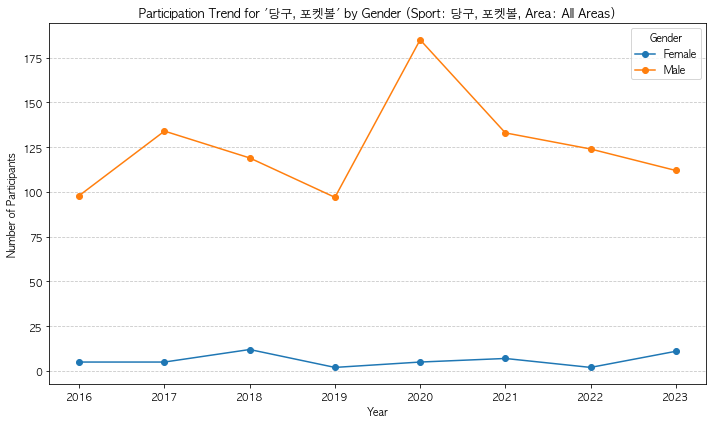

Trend Data for '당구, 포켓볼' by Gender (Sport: 당구, 포켓볼, Area: All Areas):
gender  Female  Male
dyear               
2016         5    98
2017         5   134
2018        12   119
2019         2    97
2020         5   185
2021         7   133
2022         2   124
2023        11   112


In [ ]:
show_trend(df, 'gender', '당구, 포켓볼')

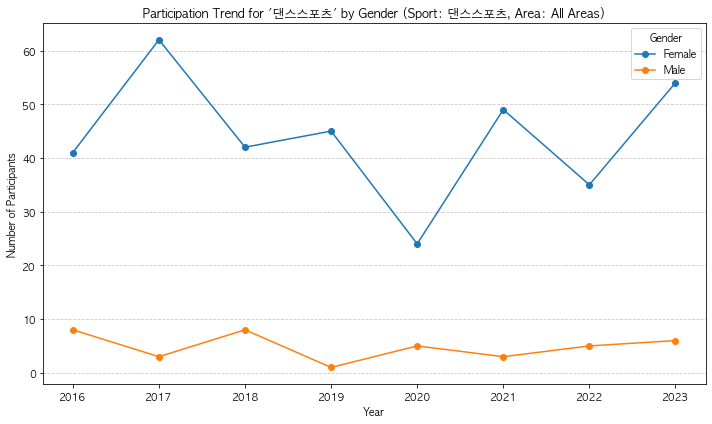

Trend Data for '댄스스포츠' by Gender (Sport: 댄스스포츠, Area: All Areas):
gender  Female  Male
dyear               
2016        41     8
2017        62     3
2018        42     8
2019        45     1
2020        24     5
2021        49     3
2022        35     5
2023        54     6


In [ ]:
show_trend(df, 'gender', '댄스스포츠')

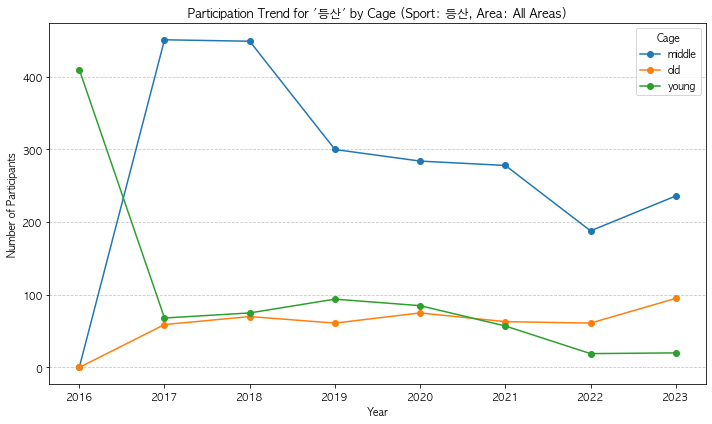

Trend Data for '등산' by Cage (Sport: 등산, Area: All Areas):
cage   middle  old  young
dyear                    
2016        0    0    410
2017      451   59     68
2018      449   70     75
2019      300   61     94
2020      284   75     85
2021      278   63     57
2022      188   61     19
2023      236   95     20


In [ ]:
# young does not like 등산?
show_trend(df, filter_type='cage', ksport='등산')